In [1]:
import pandas as pd
import networkx as nx
import numpy as np
from scipy.stats import zscore

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

import textwrap
import matplotlib.patches as patches

In [3]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [5]:
metabolites_rnaseq_combined = pd.read_csv("./metabolite_rnaseq_correlation_matrix.csv", index_col = "Unnamed: 0")

In [6]:
metabolites_rnaseq_combined

,SHP77,PC9,LUDLU1,NCIH446,MALME3M,NCIH1755,HCC1187,CORL88,NCIH2171,NCIH1155,...,NCIH526,NCIH146,HL60,NCIH82,SF268,SF539,K562,DU4475,UO31,EKVX
1,8465.333333,9022.333333,8837.75,9303.20,8096.666667,9522.833333,10228.50,7732.750000,7543.50,6046.50,...,6952.333333,8740.333333,6372.666667,7893.000000,6933.333333,6384.333333,8142.166667,7113.666667,7287.666667,7237.500000
2,4044.666667,4554.500000,2194.00,5165.70,1998.833333,2083.500000,3315.60,5039.000000,1649.50,1921.75,...,3126.833333,3292.833333,1815.833333,1601.000000,2503.833333,1782.333333,1496.666667,859.833333,2329.666667,2441.166667
3,64033.500000,83264.666667,62600.00,82707.70,64092.500000,80059.500000,98461.90,57604.833333,56346.50,92005.00,...,43897.833333,38132.333333,40767.333333,38523.500000,65668.333333,76605.666667,42010.500000,35301.666667,35755.333333,49048.666667
4,4723.000000,5952.500000,4993.75,5605.30,4952.000000,5956.500000,6132.90,4296.750000,4957.25,6419.50,...,5052.000000,4892.166667,4106.000000,3986.833333,5752.666667,6547.166667,4754.833333,5805.333333,4156.666667,4145.833333
5,4695.166667,9180.833333,5782.25,4996.00,4073.333333,5541.000000,5776.90,5652.500000,4796.50,1272.00,...,4355.833333,3167.666667,3275.666667,3918.500000,3891.500000,3358.666667,3115.833333,2953.000000,3919.166667,3034.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LINC02725,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.06,0.040000,0.00,0.00,...,2.050000,0.190000,0.000000,0.000000,0.060000,0.090000,0.000000,0.000000,0.000000,0.050000
OR13I1P,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
OR8S21P,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR6R2P,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
metabolites_rnaseq_combined_reduced = metabolites_rnaseq_combined[metabolites_rnaseq_combined.astype('bool').mean(axis=1)>=0.75]

In [8]:
correlation_array = np.corrcoef(metabolites_rnaseq_combined_reduced)

In [9]:
correlation_dataframe = pd.DataFrame(correlation_array, index = metabolites_rnaseq_combined_reduced.index, columns = metabolites_rnaseq_combined_reduced.index)

In [10]:
correlation_dataframe

,1,2,3,4,5,6,7,8,9,10,...,RAB33B-AS1,WDR5-DT,CNNM3-DT,LOC105375519,DGCR11,OR6L2P,MICE,PAXIP1-DT,LINC02019,TMEM167B-DT
1,1.000000,-0.003288,0.195129,0.202392,0.605183,0.341829,0.032831,0.075767,0.176014,0.252350,...,-0.006755,-0.089218,-0.034000,0.028997,0.074494,0.076814,0.090575,-0.000639,0.020640,0.101332
2,-0.003288,1.000000,0.032879,-0.121764,0.047230,-0.015310,0.249102,0.215369,0.597892,0.302482,...,0.048877,0.094138,0.061589,-0.181733,-0.107139,0.042073,-0.077883,0.005352,0.073043,0.063504
3,0.195129,0.032879,1.000000,0.563924,0.046657,0.051709,-0.189240,-0.065685,0.002175,0.049819,...,0.026049,-0.070193,-0.006618,0.011453,0.074189,-0.065237,0.004081,-0.050016,0.013518,-0.069438
4,0.202392,-0.121764,0.563924,1.000000,-0.013196,-0.028735,-0.092390,0.023398,0.050909,0.048726,...,0.010944,-0.081415,-0.057876,0.087133,0.062545,-0.077102,0.100749,0.067216,-0.034603,-0.045313
5,0.605183,0.047230,0.046657,-0.013196,1.000000,0.412700,-0.002929,0.054306,0.070638,0.253779,...,-0.071846,0.009529,-0.009621,0.182760,0.048154,-0.069969,-0.036403,-0.117587,0.036304,0.091568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OR6L2P,0.076814,0.042073,-0.065237,-0.077102,-0.069969,-0.018787,0.088184,0.059631,0.170359,0.122798,...,0.177720,0.309750,0.251644,0.127749,-0.109963,1.000000,0.119362,0.231978,0.145683,0.209717
MICE,0.090575,-0.077883,0.004081,0.100749,-0.036403,-0.083422,-0.003095,-0.029577,-0.110503,0.090140,...,0.063298,0.015492,0.026343,0.024391,0.097763,0.119362,1.000000,0.232721,-0.010091,-0.044100
PAXIP1-DT,-0.000639,0.005352,-0.050016,0.067216,-0.117587,0.046477,0.006224,0.004951,0.138880,-0.010753,...,0.507277,0.187463,0.323560,0.056454,-0.131513,0.231978,0.232721,1.000000,0.034857,0.100070
LINC02019,0.020640,0.073043,0.013518,-0.034603,0.036304,0.027294,0.086001,0.050879,0.019741,0.226254,...,-0.055184,0.167631,-0.169687,0.035600,-0.039243,0.145683,-0.010091,0.034857,1.000000,0.068958


In [11]:
link_dataframe = []
count = 1
for column in correlation_dataframe.columns:
    print(column + " " + str(count) + "/" + str(len(correlation_dataframe.columns)))
    count+=1
    links = pd.DataFrame(correlation_dataframe[column]).stack().reset_index()
    links.columns = ['var1', 'var2','value']
    links_filtered=links.loc[ (abs(links['value']) > 0.5) & (links['var1'] != links['var2']) ]
    link_dataframe.append(links_filtered)

1 1/19553
2 2/19553
3 3/19553
4 4/19553
5 5/19553
6 6/19553
7 7/19553
8 8/19553
9 9/19553
10 10/19553
11 11/19553
12 12/19553
13 13/19553
14 14/19553
15 15/19553
16 16/19553
17 17/19553
18 18/19553
19 19/19553
20 20/19553
21 21/19553
22 22/19553
23 23/19553
24 24/19553
25 25/19553
26 26/19553
27 27/19553
28 28/19553
29 29/19553
30 30/19553
31 31/19553
32 32/19553
33 33/19553
34 34/19553
35 35/19553
36 36/19553
37 37/19553
38 38/19553
39 39/19553
40 40/19553
41 41/19553
42 42/19553
43 43/19553
44 44/19553
45 45/19553
46 46/19553
47 47/19553
48 48/19553
49 49/19553
50 50/19553
51 51/19553
52 52/19553
53 53/19553
54 54/19553
55 55/19553
56 56/19553
57 57/19553
58 58/19553
59 59/19553
60 60/19553
61 61/19553
62 62/19553
63 63/19553
64 64/19553
65 65/19553
66 66/19553
67 67/19553
68 68/19553
69 69/19553
70 70/19553
71 71/19553
72 72/19553
73 73/19553
74 74/19553
75 75/19553
76 76/19553
77 77/19553
78 78/19553
79 79/19553
80 80/19553
81 81/19553
82 82/19553
83 83/19553
84 84/19553
85 85/1955

608 608/19553
609 609/19553
610 610/19553
611 611/19553
612 612/19553
613 613/19553
614 614/19553
615 615/19553
616 616/19553
617 617/19553
618 618/19553
619 619/19553
620 620/19553
621 621/19553
622 622/19553
623 623/19553
624 624/19553
625 625/19553
626 626/19553
627 627/19553
628 628/19553
629 629/19553
630 630/19553
631 631/19553
632 632/19553
633 633/19553
634 634/19553
635 635/19553
636 636/19553
637 637/19553
638 638/19553
639 639/19553
640 640/19553
641 641/19553
642 642/19553
643 643/19553
644 644/19553
645 645/19553
646 646/19553
647 647/19553
648 648/19553
649 649/19553
650 650/19553
651 651/19553
652 652/19553
653 653/19553
654 654/19553
655 655/19553
656 656/19553
657 657/19553
658 658/19553
659 659/19553
660 660/19553
661 661/19553
662 662/19553
663 663/19553
664 664/19553
665 665/19553
666 666/19553
667 667/19553
668 668/19553
669 669/19553
670 670/19553
671 671/19553
672 672/19553
673 673/19553
674 674/19553
675 675/19553
676 676/19553
677 677/19553
678 678/19553
679 67

SLC25A5 1170/19553
MCUB 1171/19553
HOXA11 1172/19553
POLR2J 1173/19553
DHX33 1174/19553
MEOX1 1175/19553
THSD7A 1176/19553
LIG3 1177/19553
RPAP3 1178/19553
ACSM3 1179/19553
REXO5 1180/19553
CIAPIN1 1181/19553
SPPL2B 1182/19553
FAM214B 1183/19553
COPZ2 1184/19553
PRKAR2B 1185/19553
MSL3 1186/19553
CREBBP 1187/19553
TSPOAP1 1188/19553
PON1 1189/19553
GCFC2 1190/19553
WDR54 1191/19553
CROT 1192/19553
ABCB4 1193/19553
KMT2E 1194/19553
RHBDD2 1195/19553
SOX8 1196/19553
IBTK 1197/19553
ZNF195 1198/19553
MYCBP2 1199/19553
FBXL3 1200/19553
ITGAL 1201/19553
PDK2 1202/19553
ITGA3 1203/19553
ZFX 1204/19553
LAMP2 1205/19553
ITGA2B 1206/19553
ASB4 1207/19553
GDE1 1208/19553
REX1BD 1209/19553
CRLF1 1210/19553
OSBPL7 1211/19553
TMEM98 1212/19553
YBX2 1213/19553
MAP3K14 1214/19553
TMEM132A 1215/19553
AP2B1 1216/19553
ZNF263 1217/19553
CX3CL1 1218/19553
SPATA20 1219/19553
CACNA1G 1220/19553
TNFRSF12A 1221/19553
DLX6 1222/19553
MAP3K9 1223/19553
RALA 1224/19553
BAIAP2L1 1225/19553
KDM7A 1226/19553
ETV1 

MAGEC2 1651/19553
WDR37 1652/19553
YTHDC2 1653/19553
CTPS2 1654/19553
ATP6V1H 1655/19553
POLR2B 1656/19553
FAM214A 1657/19553
ARAP2 1658/19553
TPR 1659/19553
CP 1660/19553
KATNIP 1661/19553
DTNBP1 1662/19553
XK 1663/19553
C12orf4 1664/19553
SCML1 1665/19553
WWC3 1666/19553
ARHGAP6 1667/19553
FAM184B 1668/19553
MAP4 1669/19553
GOPC 1670/19553
USP28 1671/19553
HDAC9 1672/19553
TSPAN17 1673/19553
NOP16 1674/19553
CC2D2A 1675/19553
RRM2B 1676/19553
ZNF800 1677/19553
TNFRSF17 1678/19553
SNX29 1679/19553
LMO3 1680/19553
MRPS10 1681/19553
RSF1 1682/19553
VPS13D 1683/19553
CELF2 1684/19553
FAM120A 1685/19553
R3HDM1 1686/19553
COL9A2 1687/19553
KITLG 1688/19553
ERCC8 1689/19553
ADAMTS6 1690/19553
H6PD 1691/19553
VAMP3 1692/19553
PER3 1693/19553
TNFRSF9 1694/19553
EPN3 1695/19553
LTBP1 1696/19553
RCN1 1697/19553
ELN 1698/19553
RFC2 1699/19553
ARID1B 1700/19553
CLPTM1L 1701/19553
NEDD4L 1702/19553
FOXP3 1703/19553
PPP1R3F 1704/19553
HEXB 1705/19553
PTCD2 1706/19553
JKAMP 1707/19553
DKK3 1708/1955

GBA2 2126/19553
NDST1 2127/19553
ASNS 2128/19553
AP3M2 2129/19553
CNGB1 2130/19553
ST6GALNAC2 2131/19553
PABPC1 2132/19553
TESK2 2133/19553
CFAP20 2134/19553
CSNK2A2 2135/19553
PTPN21 2136/19553
EIF2B3 2137/19553
CAMK2A 2138/19553
TCOF1 2139/19553
CDC42 2140/19553
OSBPL3 2141/19553
RAD18 2142/19553
ATP2B1 2143/19553
NCK2 2144/19553
MAP4K4 2145/19553
MGAT4A 2146/19553
RPL31 2147/19553
WDR1 2148/19553
SNX13 2149/19553
ARHGAP10 2150/19553
RPS6KA2 2151/19553
ING3 2152/19553
VASH1 2153/19553
LMCD1 2154/19553
BUD23 2155/19553
SEL1L 2156/19553
TRIP13 2157/19553
ATP6AP1 2158/19553
TCF3 2159/19553
TRIB2 2160/19553
DAZAP1 2161/19553
MBD3 2162/19553
HLTF 2163/19553
FAM50A 2164/19553
FAM3A 2165/19553
CPSF1 2166/19553
MYO3B 2167/19553
CYBRD1 2168/19553
PDCD2 2169/19553
SLC6A15 2170/19553
RDH11 2171/19553
PRKACA 2172/19553
ADGRL1 2173/19553
ACTN1 2174/19553
ZFYVE26 2175/19553
RPS6KA6 2176/19553
EPN2 2177/19553
PTPN18 2178/19553
LIMS2 2179/19553
ASIC4 2180/19553
SPEG 2181/19553
LNX1 2182/19553
ALDH3A

MGST2 2625/19553
CHERP 2626/19553
ATG16L1 2627/19553
USP40 2628/19553
POMGNT1 2629/19553
RAD54L 2630/19553
MAST2 2631/19553
DNAJA1 2632/19553
B4GALT1 2633/19553
CHMP5 2634/19553
NFX1 2635/19553
AQP6 2636/19553
DIMT1 2637/19553
IPO11 2638/19553
EIF2AK1 2639/19553
EPDR1 2640/19553
SNX10 2641/19553
SEPHS1 2642/19553
MRPL28 2643/19553
ITPKC 2644/19553
CEACAM6 2645/19553
FAT2 2646/19553
RBM22 2647/19553
TMED2 2648/19553
ERO1B 2649/19553
ZFAND6 2650/19553
HSD17B2 2651/19553
TXLNG 2652/19553
LAT2 2653/19553
HUWE1 2654/19553
ZW10 2655/19553
ALG9 2656/19553
MYBPC2 2657/19553
ACOX3 2658/19553
MTMR2 2659/19553
PPP1R15A 2660/19553
HSD17B14 2661/19553
TRIP6 2662/19553
ACHE 2663/19553
FTL 2664/19553
SRRT 2665/19553
BAX 2666/19553
NLK 2667/19553
PIGS 2668/19553
ADAMTS2 2669/19553
TMPRSS11E 2670/19553
ATXN7L3 2671/19553
PGS1 2672/19553
PSMC5 2673/19553
UIMC1 2674/19553
MMP2 2675/19553
LPCAT2 2676/19553
GNAO1 2677/19553
OGFOD1 2678/19553
SH3BP2 2679/19553
NOP14 2680/19553
ADD1 2681/19553
L2HGDH 2682/19

GTPBP1 3115/19553
POLDIP3 3116/19553
RAB36 3117/19553
TIMP3 3118/19553
PPP6R2 3119/19553
SBF1 3120/19553
SUN2 3121/19553
CYB5R3 3122/19553
DNAL4 3123/19553
MIOX 3124/19553
LMF2 3125/19553
RHBDD3 3126/19553
PACSIN2 3127/19553
TTLL1 3128/19553
RASL10A 3129/19553
AP1B1 3130/19553
HMGXB4 3131/19553
TOM1 3132/19553
NEFH 3133/19553
CHKB 3134/19553
BIK 3135/19553
HMOX1 3136/19553
MCAT 3137/19553
THOC5 3138/19553
MCM5 3139/19553
ARSA 3140/19553
TSPO 3141/19553
RASD2 3142/19553
TTLL12 3143/19553
CBX7 3144/19553
PDGFB 3145/19553
CABP7 3146/19553
RPL3 3147/19553
ZMAT5 3148/19553
RBFOX2 3149/19553
SYNGR1 3150/19553
TAB1 3151/19553
ASCC2 3152/19553
MTMR3 3153/19553
MIEF1 3154/19553
APOL4 3155/19553
APOL1 3156/19553
PNPLA3 3157/19553
MYH9 3158/19553
CACNA1I 3159/19553
SAMM50 3160/19553
TXN2 3161/19553
FOXRED2 3162/19553
GRAP2 3163/19553
EIF3D 3164/19553
TNRC6B 3165/19553
SGSM3 3166/19553
IFT27 3167/19553
KIAA0930 3168/19553
NCF4 3169/19553
CSF2RB 3170/19553
SLC25A17 3171/19553
FAM118A 3172/19553
KCT

LMF1 3600/19553
FOXF1 3601/19553
CIAO3 3602/19553
MTHFSD 3603/19553
CLCN7 3604/19553
HAGHL 3605/19553
ANTKMT 3606/19553
SLC7A5 3607/19553
METRN 3608/19553
FBXO31 3609/19553
STUB1 3610/19553
RHBDL1 3611/19553
NUBP1 3612/19553
UBE2I 3613/19553
MEFV 3614/19553
CRYM 3615/19553
EEF2K 3616/19553
CAPN15 3617/19553
PIEZO1 3618/19553
GSPT1 3619/19553
ZNF174 3620/19553
CLUAP1 3621/19553
UBFD1 3622/19553
EARS2 3623/19553
ELOB 3624/19553
GGA2 3625/19553
CPPED1 3626/19553
USP31 3627/19553
HMOX2 3628/19553
DNAJA3 3629/19553
BFAR 3630/19553
SALL1 3631/19553
TOX3 3632/19553
RRN3P2 3633/19553
RBL2 3634/19553
QPRT 3635/19553
XYLT1 3636/19553
PYCARD 3637/19553
RPGRIP1L 3638/19553
MAZ 3639/19553
STX4 3640/19553
CDIPT 3641/19553
BCKDK 3642/19553
KAT8 3643/19553
NOMO1 3644/19553
IL21R 3645/19553
SYT17 3646/19553
TMC5 3647/19553
CCP110 3648/19553
VPS35L 3649/19553
RNF40 3650/19553
KNOP1 3651/19553
AAGAB 3652/19553
IQCH 3653/19553
LACTB 3654/19553
CORO2B 3655/19553
CSK 3656/19553
HERC1 3657/19553
TRIP4 3658/1

PRKAG2 4086/19553
AEBP1 4087/19553
POLD2 4088/19553
GCK 4089/19553
BCL7B 4090/19553
YKT6 4091/19553
TBL2 4092/19553
CLIP2 4093/19553
EIF4H 4094/19553
LIMK1 4095/19553
SPATA6L 4096/19553
SLC1A1 4097/19553
LHX2 4098/19553
FKTN 4099/19553
FSD1L 4100/19553
CNTNAP3 4101/19553
SPIN1 4102/19553
NMRK1 4103/19553
TMEM245 4104/19553
PRUNE2 4105/19553
MEGF9 4106/19553
TRIM14 4107/19553
CORO2A 4108/19553
TGFBR1 4109/19553
SEC61B 4110/19553
C5 4111/19553
OGN 4112/19553
ECM2 4113/19553
TLE4 4114/19553
LHX6 4115/19553
PTGR1 4116/19553
SUSD1 4117/19553
AMBP 4118/19553
AKNA 4119/19553
DNM1 4120/19553
ENG 4121/19553
AK1 4122/19553
CDC37L1 4123/19553
RLN2 4124/19553
RLN1 4125/19553
PLGRKT 4126/19553
TBC1D13 4127/19553
RIC1 4128/19553
KDM4C 4129/19553
DOCK8 4130/19553
KANK1 4131/19553
ELAVL2 4132/19553
NCS1 4133/19553
TESK1 4134/19553
KCNT1 4135/19553
CA9 4136/19553
FUBP3 4137/19553
TYRP1 4138/19553
CREB3 4139/19553
RGP1 4140/19553
MPDZ 4141/19553
DDX58 4142/19553
EDF1 4143/19553
PIP5K1B 4144/19553
GLIS3 

MDM1 4586/19553
NUP107 4587/19553
CNOT2 4588/19553
TIMELESS 4589/19553
CPSF6 4590/19553
KRR1 4591/19553
MRPL51 4592/19553
GAPDH 4593/19553
NOP2 4594/19553
CHD4 4595/19553
ACRBP 4596/19553
UHRF1BP1L 4597/19553
COPS7A 4598/19553
ING4 4599/19553
GNB3 4600/19553
CDCA3 4601/19553
CHPT1 4602/19553
USP5 4603/19553
TPI1 4604/19553
GNPTAB 4605/19553
SPSB2 4606/19553
ENO2 4607/19553
ATN1 4608/19553
C12orf57 4609/19553
PTPN6 4610/19553
LPCAT3 4611/19553
NT5DC3 4612/19553
SLCO1B3 4613/19553
SUDS3 4614/19553
GOLT1B 4615/19553
GYS2 4616/19553
LDHB 4617/19553
PRKAB1 4618/19553
CMAS 4619/19553
HCFC2 4620/19553
ST8SIA1 4621/19553
CLEC4A 4622/19553
C2CD5 4623/19553
RAB35 4624/19553
PHC1 4625/19553
COX6A1 4626/19553
RIC8B 4627/19553
SRSF9 4628/19553
FGFR1OP2 4629/19553
COL12A1 4630/19553
BTN3A3 4631/19553
TDP2 4632/19553
FRK 4633/19553
DSE 4634/19553
RWDD1 4635/19553
RSPH4A 4636/19553
MAK 4637/19553
TMEM14C 4638/19553
PAK1IP1 4639/19553
GCNT2 4640/19553
SMIM8 4641/19553
NEDD9 4642/19553
CEP85L 4643/19553

NOL10 5088/19553
PLEKHB2 5089/19553
GORASP2 5090/19553
STRN 5091/19553
CEBPZ 5092/19553
PRKD3 5093/19553
DCAF17 5094/19553
QPCT 5095/19553
RAB3GAP1 5096/19553
SLC25A12 5097/19553
RMDN2 5098/19553
DLX2 5099/19553
DARS1 5100/19553
SRSF7 5101/19553
SDC1 5102/19553
PLCL1 5103/19553
SLC1A4 5104/19553
SOS1 5105/19553
KYNU 5106/19553
WIPF1 5107/19553
ORC2 5108/19553
COX7A2L 5109/19553
PNO1 5110/19553
ORC4 5111/19553
PLEK 5112/19553
RND3 5113/19553
ATF2 5114/19553
THADA 5115/19553
AAK1 5116/19553
TRAK2 5117/19553
C2orf42 5118/19553
TIA1 5119/19553
PCYOX1 5120/19553
KISS1R 5121/19553
EPAS1 5122/19553
ARID3A 5123/19553
SUMO1 5124/19553
GRIN3B 5125/19553
VAX2 5126/19553
ATP6V1B1 5127/19553
NFE2L2 5128/19553
MSH6 5129/19553
PLEKHA3 5130/19553
SPR 5131/19553
EPHA4 5132/19553
PARD3B 5133/19553
FARSB 5134/19553
ALMS1 5135/19553
BCL9 5136/19553
PRRX1 5137/19553
DHCR24 5138/19553
DNAJC16 5139/19553
MARK1 5140/19553
MORN1 5141/19553
GPX7 5142/19553
CACYBP 5143/19553
SCP2 5144/19553
PAPPA2 5145/19553
RAL

CD274 5568/19553
GRIA2 5569/19553
NUP43 5570/19553
MTHFD1L 5571/19553
LRP11 5572/19553
PCMT1 5573/19553
PLEKHG1 5574/19553
CYSTM1 5575/19553
WDR55 5576/19553
ARAP3 5577/19553
PCDHB8 5578/19553
PCDHB10 5579/19553
PCDHB14 5580/19553
PCDHB12 5581/19553
MRPS14 5582/19553
CENPL 5583/19553
TNFSF18 5584/19553
SEC16B 5585/19553
GORAB 5586/19553
ACAT2 5587/19553
TCP1 5588/19553
SNX19 5589/19553
MSANTD2 5590/19553
TP53AIP1 5591/19553
PDZD11 5592/19553
SLC10A7 5593/19553
NUDCD1 5594/19553
ENY2 5595/19553
MASTL 5596/19553
KIAA1217 5597/19553
SEPTIN7P9 5598/19553
PLXDC2 5599/19553
EPC1 5600/19553
CCDC77 5601/19553
TAF12 5602/19553
ENOX1 5603/19553
MTRF1 5604/19553
SPART-AS1 5605/19553
SOHLH2 5606/19553
DNAJC15 5607/19553
PROSER1 5608/19553
UFM1 5609/19553
WBP4 5610/19553
ELF1 5611/19553
SMAD9 5612/19553
HSPH1 5613/19553
KBTBD7 5614/19553
ALG5 5615/19553
EXOSC8 5616/19553
ETF1 5617/19553
TGFBI 5618/19553
FAM53C 5619/19553
SIL1 5620/19553
PAIP2 5621/19553
MYOT 5622/19553
KDM3B 5623/19553
EGR1 5624/19

FAM193A 6064/19553
GRK4 6065/19553
SOX9 6066/19553
HS3ST3B1 6067/19553
SLC25A35 6068/19553
MRPS7 6069/19553
GGA3 6070/19553
ARMC7 6071/19553
NUP85 6072/19553
SLC25A19 6073/19553
MIF4GD 6074/19553
NT5C 6075/19553
MSTO1 6076/19553
MIR9-1HG 6077/19553
TTF1 6078/19553
GTF3C4 6079/19553
DDX31 6080/19553
PPP1R12C 6081/19553
MBOAT7 6082/19553
SRMS 6083/19553
OPRL1 6084/19553
SLC2A4RG 6085/19553
FNDC11 6086/19553
PPDPF 6087/19553
IL1B 6088/19553
PLGLB2 6089/19553
IL37 6090/19553
CHCHD5 6091/19553
PAX8 6092/19553
INSIG2 6093/19553
POLR1B 6094/19553
CCDC93 6095/19553
PSD4 6096/19553
SLC25A23 6097/19553
PSPN 6098/19553
GTF2F1 6099/19553
ALKBH7 6100/19553
CLPP 6101/19553
TNFSF9 6102/19553
THOC2 6103/19553
MED1 6104/19553
RPL23 6105/19553
ATG4C 6106/19553
CD70 6107/19553
C3 6108/19553
SH2D3A 6109/19553
TRIP10 6110/19553
GPR108 6111/19553
TNFSF14 6112/19553
FOSB 6113/19553
OPA3 6114/19553
SNRPD2 6115/19553
RTN2 6116/19553
EML2 6117/19553
VASP 6118/19553
SYMPK 6119/19553
GPCPD1 6120/19553
SDCBP2 6121

ECSIT 6551/19553
LDLR 6552/19553
ELOF1 6553/19553
PRKCSH 6554/19553
CNN1 6555/19553
CDC16 6556/19553
THEM6 6557/19553
NECTIN2 6558/19553
APOE 6559/19553
TOMM40 6560/19553
APOC1 6561/19553
GADD45G 6562/19553
LRCH2 6563/19553
XPO7 6564/19553
ACE2 6565/19553
FAM98C 6566/19553
SAFB2 6567/19553
RPL36 6568/19553
ATP8B3 6569/19553
GDF1 6570/19553
NCAN 6571/19553
KIF1A 6572/19553
GTPBP3 6573/19553
BST2 6574/19553
SLC27A1 6575/19553
NSUN5 6576/19553
USHBP1 6577/19553
COLGALT1 6578/19553
DDA1 6579/19553
MRPL34 6580/19553
PGLS 6581/19553
LSM7 6582/19553
TULP4 6583/19553
SNX9 6584/19553
RTN4IP1 6585/19553
QRSL1 6586/19553
MTRES1 6587/19553
RSPH3 6588/19553
ACSBG2 6589/19553
MLLT1 6590/19553
FUT5 6591/19553
AFDN 6592/19553
ACTN4 6593/19553
STK33 6594/19553
NDUFA10 6595/19553
EPO 6596/19553
ARPC1B 6597/19553
CACNG6 6598/19553
ZSWIM6 6599/19553
FCHO1 6600/19553
UNC13A 6601/19553
MAP1S 6602/19553
KLHDC7B 6603/19553
PXDN 6604/19553
SSBP4 6605/19553
GDF15 6606/19553
PGPEP1 6607/19553
IQCN 6608/19553
LSM

FAM83F 7024/19553
SEC14L4 7025/19553
ZDHHC8P1 7026/19553
ADCK2 7027/19553
MKRN1 7028/19553
AGAP3 7029/19553
KRBA1 7030/19553
ZNF767P 7031/19553
ACTR3B 7032/19553
NTS 7033/19553
BTG1 7034/19553
LRRIQ1 7035/19553
C12orf29 7036/19553
ATP13A3 7037/19553
SFTPD 7038/19553
TMEM254 7039/19553
TMTC1 7040/19553
KRAS 7041/19553
IPO8 7042/19553
LARS1 7043/19553
SPINK5 7044/19553
IMPA1 7045/19553
LRRCC1 7046/19553
E2F5 7047/19553
CCDC59 7048/19553
SWAP70 7049/19553
ARNTL 7050/19553
AMPD3 7051/19553
SBF2 7052/19553
MICAL2 7053/19553
RRAS2 7054/19553
HSD17B4 7055/19553
ZFC3H1 7056/19553
TEX15 7057/19553
SARAF 7058/19553
RNF122 7059/19553
DPF2 7060/19553
MEN1 7061/19553
ERG28 7062/19553
DGLUCY 7063/19553
UNC79 7064/19553
NUMB 7065/19553
COX16 7066/19553
TTC9 7067/19553
MED6 7068/19553
EIF2S1 7069/19553
ADAM20 7070/19553
LOXL2 7071/19553
ELP3 7072/19553
CTIF 7073/19553
MBD2 7074/19553
IER3IP1 7075/19553
MRPS36 7076/19553
CCNB1 7077/19553
CDK7 7078/19553
IRAK2 7079/19553
CAMK1 7080/19553
THUMPD3 7081/19

HS6ST1 7509/19553
UGGT1 7510/19553
GYPC 7511/19553
STAM 7512/19553
ABI1 7513/19553
YME1L1 7514/19553
DNAJC1 7515/19553
NIPSNAP3A 7516/19553
LRRC8A 7517/19553
CDK9 7518/19553
TXN 7519/19553
ODF2 7520/19553
ECPAS 7521/19553
TOR1B 7522/19553
C9orf78 7523/19553
SMC2 7524/19553
KLF4 7525/19553
TOR1A 7526/19553
RALGPS1 7527/19553
NIBAN2 7528/19553
ST6GALNAC4 7529/19553
TMOD1 7530/19553
DAB2IP 7531/19553
STXBP1 7532/19553
SLC2A8 7533/19553
ANGPTL2 7534/19553
CDK5RAP2 7535/19553
ZFP37 7536/19553
SLC31A2 7537/19553
SLC31A1 7538/19553
TLR4 7539/19553
ZNF189 7540/19553
STX17 7541/19553
PRPF4 7542/19553
FPGS 7543/19553
USP20 7544/19553
BAAT 7545/19553
KIF12 7546/19553
ATP6V1G1 7547/19553
TEX10 7548/19553
GARNL3 7549/19553
MRPL50 7550/19553
DPM2 7551/19553
TSTD2 7552/19553
GABBR2 7553/19553
PSMB7 7554/19553
TRMO 7555/19553
RABEPK 7556/19553
GOLGA1 7557/19553
XPA 7558/19553
NCBP1 7559/19553
ANP32B 7560/19553
PDCL 7561/19553
RPL35 7562/19553
CTSV 7563/19553
LMX1B 7564/19553
ARPC5L 7565/19553
ENPP2 75

FRMD6 8012/19553
PELI2 8013/19553
RTN1 8014/19553
ARMH4 8015/19553
SYT16 8016/19553
SLC38A6 8017/19553
NAA30 8018/19553
ADAM21 8019/19553
RDH12 8020/19553
DCAF5 8021/19553
RAB15 8022/19553
WDR89 8023/19553
ESR2 8024/19553
STON2 8025/19553
EFCAB11 8026/19553
PTGR2 8027/19553
JDP2 8028/19553
AK7 8029/19553
FBLN5 8030/19553
CLBA1 8031/19553
WARS1 8032/19553
WDR20 8033/19553
NIPA2 8034/19553
SLC12A6 8035/19553
DUOXA1 8036/19553
MFAP1 8037/19553
TCF12 8038/19553
SORD 8039/19553
SERF2 8040/19553
ZSCAN29 8041/19553
DUOX2 8042/19553
LYSMD2 8043/19553
SLC27A2 8044/19553
FGF7 8045/19553
HDC 8046/19553
GCNT3 8047/19553
BNIP2 8048/19553
GTF2A2 8049/19553
SRP14 8050/19553
BAHD1 8051/19553
DISP2 8052/19553
CDAN1 8053/19553
TLE3 8054/19553
ANP32A 8055/19553
COMMD4 8056/19553
UBE2Q2 8057/19553
PSTPIP1 8058/19553
ETFA 8059/19553
BCL2A1 8060/19553
HMG20A 8061/19553
SCAPER 8062/19553
TSPAN3 8063/19553
WDR61 8064/19553
NCOA2 8065/19553
NEIL1 8066/19553
MAN2C1 8067/19553
DNAJA4 8068/19553
TLNRD1 8069/19553

C1orf131 8487/19553
GALNT2 8488/19553
TTC13 8489/19553
SCCPDH 8490/19553
LYST 8491/19553
MAP3K21 8492/19553
CEP170 8493/19553
ACP1 8494/19553
SNAP47 8495/19553
SRP9 8496/19553
NVL 8497/19553
SDE2 8498/19553
DEGS1 8499/19553
FBXO28 8500/19553
ARF1 8501/19553
CNIH4 8502/19553
ITPKB 8503/19553
GUK1 8504/19553
CDC42BPA 8505/19553
CNIH3 8506/19553
C1orf35 8507/19553
MBOAT2 8508/19553
PARP1 8509/19553
PSEN2 8510/19553
PYCR2 8511/19553
LBR 8512/19553
WNT9A 8513/19553
EPHX1 8514/19553
REN 8515/19553
SOX13 8516/19553
ETNK2 8517/19553
PPFIA4 8518/19553
PLEKHA6 8519/19553
PTPN7 8520/19553
SYT2 8521/19553
ARL8A 8522/19553
OSR1 8523/19553
PDIA6 8524/19553
RHOB 8525/19553
ATP6V1C2 8526/19553
HNRNPLL 8527/19553
GALM 8528/19553
CAMKMT 8529/19553
EML4 8530/19553
CALM2 8531/19553
CHAC2 8532/19553
RPS27A 8533/19553
WDPCP 8534/19553
VPS54 8535/19553
ASXL2 8536/19553
ETAA1 8537/19553
SNRPG 8538/19553
ABHD1 8539/19553
MEIS1 8540/19553
CIAO1 8541/19553
ZNF514 8542/19553
SNRNP200 8543/19553
MRPS5 8544/19553
A

C9orf72 8966/19553
ZCCHC7 8967/19553
FBXO10 8968/19553
SIGMAR1 8969/19553
CBWD5 8970/19553
CEP78 8971/19553
NTRK2 8972/19553
IDNK 8973/19553
SHC3 8974/19553
AUH 8975/19553
MFSD14B 8976/19553
AOPEP 8977/19553
ZNF462 8978/19553
INIP 8979/19553
UGCG 8980/19553
SNX30 8981/19553
STOM 8982/19553
GSN 8983/19553
MRRF 8984/19553
NR6A1 8985/19553
CRB2 8986/19553
ALAD 8987/19553
ASTN2 8988/19553
WDR31 8989/19553
POLE3 8990/19553
SURF4 8991/19553
GBGT1 8992/19553
SURF1 8993/19553
SURF2 8994/19553
SURF6 8995/19553
MED22 8996/19553
REXO4 8997/19553
RPL7A 8998/19553
GTF3C5 8999/19553
ASB6 9000/19553
PTGES2 9001/19553
NTMT1 9002/19553
CIZ1 9003/19553
SLC25A25 9004/19553
SH3GLB2 9005/19553
MIGA2 9006/19553
PTGES 9007/19553
LCN2 9008/19553
LRSAM1 9009/19553
HMCN2 9010/19553
GPR107 9011/19553
PAXX 9012/19553
INPP5E 9013/19553
SEC16A 9014/19553
DPH7 9015/19553
NOTCH1 9016/19553
CACNA1B 9017/19553
NACC2 9018/19553
PROSER2 9019/19553
USP6NL 9020/19553
COMMD3 9021/19553
MSRB2 9022/19553
PDSS1 9023/19553
FAM1

TXNDC11 9444/19553
DAB2 9445/19553
ACMSD 9446/19553
ACOXL 9447/19553
BCL2L11 9448/19553
ANAPC1 9449/19553
CAST 9450/19553
SCOC 9451/19553
CLGN 9452/19553
CETN3 9453/19553
SMARCA5 9454/19553
SYCP2L 9455/19553
BMP6 9456/19553
RGPD3 9457/19553
RASSF3 9458/19553
HNRNPU 9459/19553
RANBP2 9460/19553
AHCTF1 9461/19553
MERTK 9462/19553
TMEM87B 9463/19553
PTPRR 9464/19553
NR4A2 9465/19553
CCDC148 9466/19553
PLA2R1 9467/19553
RBMS1 9468/19553
SCN3A 9469/19553
CD96 9470/19553
SLC25A27 9471/19553
ADGRF1 9472/19553
ADGRF4 9473/19553
CYRIB 9474/19553
ASAP1 9475/19553
TRAPPC8 9476/19553
LINC00467 9477/19553
INO80C 9478/19553
LPCAT1 9479/19553
PLEKHG4B 9480/19553
NMRAL1 9481/19553
UBALD1 9482/19553
C16orf89 9483/19553
TMEM251 9484/19553
ING1 9485/19553
TEX29 9486/19553
ADPRHL1 9487/19553
CMTM7 9488/19553
FBXL2 9489/19553
UBP1 9490/19553
RMND5A 9491/19553
CD8A 9492/19553
RPIA 9493/19553
PTPRD 9494/19553
LURAP1L 9495/19553
CNKSR3 9496/19553
GTF2E1 9497/19553
CFDP1 9498/19553
ZDHHC7 9499/19553
C7orf31 95

TENT5B 9930/19553
CLSTN2 9931/19553
COLEC12 9932/19553
RNF207 9933/19553
CUL4B 9934/19553
GPR153 9935/19553
SLC13A3 9936/19553
GPRASP2 9937/19553
RHBDL2 9938/19553
AUTS2 9939/19553
H2BC5 9940/19553
CDC25C 9941/19553
H4C8 9942/19553
MITD1 9943/19553
EIF5B 9944/19553
RIBC1 9945/19553
TMSB15B 9946/19553
CATIP 9947/19553
CNOT11 9948/19553
KCNB1 9949/19553
TSPAN33 9950/19553
NRG2 9951/19553
AHCYL2 9952/19553
B4GALT5 9953/19553
SPATA2 9954/19553
SNX29P1 9955/19553
FAM86C1P 9956/19553
DNAH3 9957/19553
NCF1 9958/19553
CPA5 9959/19553
TSR2 9960/19553
PPP1R9A 9961/19553
ZC3H18 9962/19553
ZFAND2B 9963/19553
GDPD5 9964/19553
DYNC1I1 9965/19553
PFKFB1 9966/19553
TMED4 9967/19553
PPP1R15B 9968/19553
COPG2 9969/19553
EMSY 9970/19553
GPAT4 9971/19553
PKD1L1 9972/19553
ZSCAN12 9973/19553
TAGLN2 9974/19553
ELK4 9975/19553
SLAMF8 9976/19553
SLC45A3 9977/19553
DUSP23 9978/19553
RNF166 9979/19553
NBL1 9980/19553
F11R 9981/19553
USF1 9982/19553
SPATA2L 9983/19553
NIT1 9984/19553
DEDD 9985/19553
ZNF276 9986/

AKR7A3 10382/19553
DRAXIN 10383/19553
PDPN 10384/19553
DHRS3 10385/19553
MATN1 10386/19553
LAPTM5 10387/19553
SDC3 10388/19553
PEF1 10389/19553
SYNC 10390/19553
RBBP4 10391/19553
KIAA1522 10392/19553
TSSK3 10393/19553
TMCO4 10394/19553
CAMK2N1 10395/19553
ALPL 10396/19553
WNT4 10397/19553
SCNN1D 10398/19553
MXRA8 10399/19553
FAAP20 10400/19553
MEGF6 10401/19553
DIRAS3 10402/19553
NFIA 10403/19553
OMA1 10404/19553
MYSM1 10405/19553
TM2D1 10406/19553
USP1 10407/19553
FUBP1 10408/19553
NEXN 10409/19553
DNAJB4 10410/19553
LRRIQ3 10411/19553
TYW3 10412/19553
SNX7 10413/19553
B3GALT2 10414/19553
NTNG1 10415/19553
FAM102B 10416/19553
HENMT1 10417/19553
AKNAD1 10418/19553
C1orf52 10419/19553
DNAI3 10420/19553
GBP2 10421/19553
ATXN7L2 10422/19553
GBP4 10423/19553
ZNF326 10424/19553
HFM1 10425/19553
GFI1 10426/19553
KCNT2 10427/19553
AGL 10428/19553
VCAM1 10429/19553
EXTL2 10430/19553
SLC30A7 10431/19553
ZNF281 10432/19553
ARPC5 10433/19553
NLRP3 10434/19553
ZNF496 10435/19553
TRIM58 10436/19553

RHOBTB3 10833/19553
GPX8 10834/19553
TIGD6 10835/19553
SERINC5 10836/19553
CAGE1 10837/19553
CASP3 10838/19553
PRIMPOL 10839/19553
ERAP1 10840/19553
ERAP2 10841/19553
CMYA5 10842/19553
EGFLAM 10843/19553
CFAP97 10844/19553
RICTOR 10845/19553
TENT2 10846/19553
EBF1 10847/19553
ANKRA2 10848/19553
UBLCP1 10849/19553
UTP15 10850/19553
TLR3 10851/19553
NSA2 10852/19553
GFM2 10853/19553
TERT 10854/19553
CCDC127 10855/19553
FOXQ1 10856/19553
LINC01600 10857/19553
ACSL6 10858/19553
CSF2 10859/19553
SEPTIN8 10860/19553
SHROOM1 10861/19553
GDF9 10862/19553
UQCRQ 10863/19553
LEAP2 10864/19553
GJB7 10865/19553
SLC35A1 10866/19553
GRIK2 10867/19553
CGAS 10868/19553
CITED2 10869/19553
CREBRF 10870/19553
DCBLD1 10871/19553
SFXN1 10872/19553
TMEM200A 10873/19553
PDSS2 10874/19553
STXBP5 10875/19553
IL31RA 10876/19553
RAET1E 10877/19553
DAGLB 10878/19553
KIAA0895 10879/19553
STK17A 10880/19553
TRA2A 10881/19553
GALNT10 10882/19553
SAP30L 10883/19553
RPS14 10884/19553
MYOZ3 10885/19553
COG5 10886/19553


BEAN1 11281/19553
TK2 11282/19553
TMED3 11283/19553
SEC11C 11284/19553
TMEM135 11285/19553
IQCD 11286/19553
NDEL1 11287/19553
CENPV 11288/19553
RRAD 11289/19553
CIAO2B 11290/19553
CFAP52 11291/19553
HSP90B1 11292/19553
BLCAP 11293/19553
CHRFAM7A 11294/19553
ATF7IP2 11295/19553
MMP10 11296/19553
TVP23A 11297/19553
BEX3 11298/19553
TMPRSS5 11299/19553
COG1 11300/19553
PLEKHA7 11301/19553
ZNF606 11302/19553
ZCCHC18 11303/19553
B2M 11304/19553
ZNF592 11305/19553
GOLM2 11306/19553
NNMT 11307/19553
AP1G1 11308/19553
SLFN5 11309/19553
CATSPER2 11310/19553
ZNF667-AS1 11311/19553
BMERB1 11312/19553
MARF1 11313/19553
SAAL1 11314/19553
YPEL4 11315/19553
PPIB 11316/19553
LDHC 11317/19553
CIAO2A 11318/19553
LDHAL6A 11319/19553
FAM111A 11320/19553
PCLAF 11321/19553
KIF7 11322/19553
LDHD 11323/19553
PLIN1 11324/19553
PEX11A 11325/19553
TMEM170A 11326/19553
MESP1 11327/19553
ANPEP 11328/19553
SCNN1G 11329/19553
RBPMS2 11330/19553
NAV2 11331/19553
ANKDD1A 11332/19553
C18orf54 11333/19553
DCTN5 11334/19

CTRB2 11743/19553
TMEM129 11744/19553
PPIC 11745/19553
SPRY3 11746/19553
CEP120 11747/19553
STXBP6 11748/19553
MFF 11749/19553
LGALS9 11750/19553
JMJD7-PLA2G4B 11751/19553
CPLX1 11752/19553
PXDC1 11753/19553
E2F6 11754/19553
FEM1B 11755/19553
COMMD8 11756/19553
ATP5ME 11757/19553
UQCRFS1 11758/19553
SLC49A3 11759/19553
COL4A3 11760/19553
MAP2K1 11761/19553
KLK7 11762/19553
HNRNPH1 11763/19553
IRS1 11764/19553
MECP2 11765/19553
UPF3A 11766/19553
ACTBL2 11767/19553
ROR2 11768/19553
AR 11769/19553
DHRSX 11770/19553
VXN 11771/19553
HSPBAP1 11772/19553
ASMTL 11773/19553
SLC25A6 11774/19553
CHST14 11775/19553
PARM1 11776/19553
CSNK1G1 11777/19553
FAM110B 11778/19553
ODAD2 11779/19553
AFAP1L2 11780/19553
ZNF354A 11781/19553
ATF5 11782/19553
UBE2V2 11783/19553
ZBTB43 11784/19553
CPT1C 11785/19553
PCSK9 11786/19553
XPO6 11787/19553
MN1 11788/19553
APEX2 11789/19553
NSMCE1 11790/19553
CCDC126 11791/19553
NPIPB12 11792/19553
RAB3B 11793/19553
CD2BP2 11794/19553
RGS14 11795/19553
TBC1D10B 11796/19

GPHN 12214/19553
VAT1L 12215/19553
TMEM51 12216/19553
CAMTA1 12217/19553
LGALS4 12218/19553
LRRC34 12219/19553
SPATA5L1 12220/19553
GATM 12221/19553
RASGRP4 12222/19553
NHLH1 12223/19553
SLFNL1 12224/19553
BCL2 12225/19553
RHNO1 12226/19553
CTPS1 12227/19553
KNDC1 12228/19553
METTL18 12229/19553
COL8A2 12230/19553
PWWP2B 12231/19553
ZNF540 12232/19553
FBXL14 12233/19553
EXOSC10 12234/19553
ZNF570 12235/19553
NINJ2 12236/19553
MLLT3 12237/19553
FAM90A1 12238/19553
RRM2 12239/19553
TRAPPC12 12240/19553
RPS21 12241/19553
C3AR1 12242/19553
MRM3 12243/19553
PTEN 12244/19553
RPS7 12245/19553
RNASEH1 12246/19553
PRNP 12247/19553
ADRA1D 12248/19553
FRMD5 12249/19553
MIR31HG 12250/19553
CYP4F11 12251/19553
TLN2 12252/19553
TVP23B 12253/19553
FBXW10 12254/19553
ZNF217 12255/19553
SRGAP2C 12256/19553
SCG2 12257/19553
ATPAF2 12258/19553
PPIH 12259/19553
DRC3 12260/19553
ZNF57 12261/19553
SHLD1 12262/19553
JMJD1C 12263/19553
LDHAL6B 12264/19553
SYNPO 12265/19553
MAL 12266/19553
ZNF554 12267/19553
R

BTC 12669/19553
PDZK1 12670/19553
ADGRE1 12671/19553
DENND6A 12672/19553
PDE12 12673/19553
GLMN 12674/19553
DNAH12 12675/19553
YIF1A 12676/19553
CNIH2 12677/19553
NDUFA11 12678/19553
RSRC1 12679/19553
SLC66A1L 12680/19553
RAB1B 12681/19553
METTL15P1 12682/19553
PTDSS2 12683/19553
MICOS13 12684/19553
C3orf33 12685/19553
SEZ6L2 12686/19553
ASPHD1 12687/19553
KCTD13 12688/19553
AMZ1 12689/19553
FUT1 12690/19553
DHX36 12691/19553
FBXW8 12692/19553
KLC2 12693/19553
SLC22A1 12694/19553
CTBP2 12695/19553
CHST2 12696/19553
ZDHHC14 12697/19553
ATR 12698/19553
SNHG29 12699/19553
UBE2C 12700/19553
GK5 12701/19553
VCPIP1 12702/19553
DES 12703/19553
PDIK1L 12704/19553
RAG2 12705/19553
TRAF6 12706/19553
ZNF654 12707/19553
TVP23C 12708/19553
MRPS22 12709/19553
PACS1 12710/19553
MARCKSL1 12711/19553
SH3BP5L 12712/19553
TMEM51-AS1 12713/19553
YPEL2 12714/19553
CADM2 12715/19553
PSMD2 12716/19553
FAM182B 12717/19553
PPM1E 12718/19553
FAM131A 12719/19553
CSRP2 12720/19553
INHBC 12721/19553
PARL 12722/195

TMEM151B 13122/19553
GALNT11 13123/19553
WDR6 13124/19553
GEN1 13125/19553
TMPRSS9 13126/19553
AQP11 13127/19553
TMEM11 13128/19553
ZNF354B 13129/19553
KCNG2 13130/19553
SHISA3 13131/19553
ZFAND2A 13132/19553
PLEKHM3 13133/19553
ZNF223 13134/19553
FAM220A 13135/19553
DNAJC22 13136/19553
NEUROG2 13137/19553
CEP295NL 13138/19553
BEND3 13139/19553
NT5DC1 13140/19553
RPS3AP5 13141/19553
TIMM23B-AGAP6 13142/19553
GLDC 13143/19553
COX14 13144/19553
H3P16 13145/19553
MCMDC2 13146/19553
TUBAL3 13147/19553
RPL10P16 13148/19553
P4HTM 13149/19553
DTX3 13150/19553
KLHL11 13151/19553
CTXN1 13152/19553
SLC25A20 13153/19553
CA8 13154/19553
CD28 13155/19553
EPM2AIP1 13156/19553
ERBB4 13157/19553
MAF 13158/19553
CTNNBIP1 13159/19553
GTPBP6 13160/19553
ERN1 13161/19553
GPR35 13162/19553
ACTG1P1 13163/19553
ARMC10P1 13164/19553
CSRNP3 13165/19553
ZNF713 13166/19553
PARP10 13167/19553
SUZ12 13168/19553
NSUN3 13169/19553
KCTD12 13170/19553
DHFR2 13171/19553
RPP25 13172/19553
GRINA 13173/19553
THBD 13174/19

NOP10 13566/19553
FAM89A 13567/19553
TDRKH 13568/19553
ZNF708 13569/19553
IST1 13570/19553
ERCC6L2 13571/19553
MRPL41 13572/19553
CREB3L2 13573/19553
P2RY8 13574/19553
TP53TG1 13575/19553
UNC5C 13576/19553
TSEN54 13577/19553
RGMA 13578/19553
UBA7 13579/19553
MRPS16 13580/19553
RAD51B 13581/19553
LDOC1 13582/19553
ARL6IP4 13583/19553
EXT1 13584/19553
SHMT2 13585/19553
MOB2 13586/19553
HHIPL1 13587/19553
ATP6AP2 13588/19553
CYB5D1 13589/19553
BACE2 13590/19553
UBE2E2 13591/19553
SYNM 13592/19553
PRR34 13593/19553
FIGN 13594/19553
IZUMO1 13595/19553
B4GALNT4 13596/19553
AP1S2 13597/19553
C8orf33 13598/19553
DCAF4L1 13599/19553
SPACA6 13600/19553
ZSCAN22 13601/19553
KCNJ14 13602/19553
FBXL6 13603/19553
C1S 13604/19553
GLTPD2 13605/19553
KBTBD3 13606/19553
YBEY 13607/19553
FAM87A 13608/19553
CLN8 13609/19553
LOC339059 13610/19553
PLCXD1 13611/19553
NXPH4 13612/19553
CACNB4 13613/19553
TRAPPC6B 13614/19553
PGBD4 13615/19553
NPLOC4 13616/19553
TEX19 13617/19553
TSHZ2 13618/19553
CAPN12 13619/

AP3M1 14016/19553
F8 14017/19553
NT5C1B 14018/19553
CA13 14019/19553
UBOX5 14020/19553
MAFF 14021/19553
BRF1 14022/19553
LRRC14B 14023/19553
SEMA4B 14024/19553
CIB1 14025/19553
ANKS1B 14026/19553
NELFA 14027/19553
SLC24A3 14028/19553
EFCAB10 14029/19553
FLRT2 14030/19553
INTS5 14031/19553
RPS27L 14032/19553
MANEAL 14033/19553
ADSS1 14034/19553
ANO9 14035/19553
FAF1 14036/19553
MYADML2 14037/19553
FAM43A 14038/19553
NSMCE3 14039/19553
HSF1 14040/19553
C6orf120 14041/19553
PURA 14042/19553
H2BC13 14043/19553
INPP5J 14044/19553
LRRC37B 14045/19553
DDX51 14046/19553
NOMO2 14047/19553
LINC00482 14048/19553
LINC00313 14049/19553
SIGIRR 14050/19553
NRBP2 14051/19553
IFITM2 14052/19553
TNFAIP2 14053/19553
ZNF445 14054/19553
PGBD2 14055/19553
TCEAL9 14056/19553
RAB11B 14057/19553
PRMT3 14058/19553
GP1BA 14059/19553
PRPF39 14060/19553
MAGEA11 14061/19553
PPIL6 14062/19553
ZNF74 14063/19553
KIAA0825 14064/19553
UBALD2 14065/19553
CDNF 14066/19553
NOTUM 14067/19553
RBM11 14068/19553
CD24P4 14069/1

UBQLN2 14464/19553
RILPL1 14465/19553
ZNF490 14466/19553
NRN1L 14467/19553
NWD1 14468/19553
ARL4C 14469/19553
TMEM221 14470/19553
RAB42 14471/19553
WNT7B 14472/19553
ZFTA 14473/19553
GPR89B 14474/19553
MESP2 14475/19553
EYS 14476/19553
C6orf132 14477/19553
MAPK12 14478/19553
NUTM2G 14479/19553
COL4A5 14480/19553
AGRN 14481/19553
NHS 14482/19553
FAM166A 14483/19553
TMPPE 14484/19553
ZNF626 14485/19553
HEPACAM2 14486/19553
SMTNL2 14487/19553
ZC3H6 14488/19553
LINC00265 14489/19553
LAMTOR4 14490/19553
PRKAR1B 14491/19553
NUTM2B 14492/19553
NCR3LG1 14493/19553
DCUN1D3 14494/19553
POTEE 14495/19553
ZNF793 14496/19553
TUBB4B 14497/19553
AGAP4 14498/19553
PP7080 14499/19553
COMMD6 14500/19553
HYKK 14501/19553
C15orf62 14502/19553
ZNF383 14503/19553
HES4 14504/19553
ZNF669 14505/19553
PEAK3 14506/19553
CENPP 14507/19553
PLSCR1 14508/19553
C3orf62 14509/19553
ENO4 14510/19553
ZNF559 14511/19553
SBK1 14512/19553
SLC38A3 14513/19553
GTF2F2 14514/19553
CIBAR1 14515/19553
FOCAD 14516/19553
PRR19 14

LAGE3 14903/19553
WDR5B 14904/19553
NPIPB9 14905/19553
WDR45 14906/19553
METTL9 14907/19553
ZNF138 14908/19553
ZNF429 14909/19553
ZNF470 14910/19553
SERTAD1 14911/19553
ZNF100 14912/19553
EOLA2 14913/19553
ZNF398 14914/19553
ZSCAN25 14915/19553
ANXA6 14916/19553
ZNF441 14917/19553
GMFB 14918/19553
SIGLEC15 14919/19553
ZNF420 14920/19553
ZNF763 14921/19553
ZMYM1 14922/19553
H4C3 14923/19553
ZSCAN26 14924/19553
MAFG 14925/19553
ARRDC1 14926/19553
KIAA1671 14927/19553
IGF2R 14928/19553
GAL3ST4 14929/19553
DYNC1H1 14930/19553
SLC6A17 14931/19553
PCBP2 14932/19553
ZGPAT 14933/19553
SLC25A29 14934/19553
PGAP1 14935/19553
SRC 14936/19553
ZNF682 14937/19553
ZNF772 14938/19553
ZNF257 14939/19553
PCNX3 14940/19553
ADAM32 14941/19553
ACSL5 14942/19553
LRRC8B 14943/19553
ABCB8 14944/19553
H3C12 14945/19553
SND1 14946/19553
ZNF785 14947/19553
SULT1A2 14948/19553
NEK5 14949/19553
PSMD12 14950/19553
MAGEA6 14951/19553
CH17-340M24.3 14952/19553
PIWIL2 14953/19553
MIRLET7BHG 14954/19553
NOL4L 14955/195

RUNDC1 15347/19553
CCDC152 15348/19553
STKLD1 15349/19553
GRK5 15350/19553
TYW1 15351/19553
DCAF12 15352/19553
SFMBT2 15353/19553
PNMA5 15354/19553
ITPRIPL1 15355/19553
ND4 15356/19553
SMC5 15357/19553
ND1 15358/19553
PRMT6 15359/19553
SHISA4 15360/19553
CIPC 15361/19553
CAPZA2 15362/19553
ATP6 15363/19553
TOP1 15364/19553
PRC1 15365/19553
BHLHB9 15366/19553
MAP3K3 15367/19553
L1CAM 15368/19553
SREBF2 15369/19553
C1orf174 15370/19553
RASGEF1A 15371/19553
SPOUT1 15372/19553
RPL39 15373/19553
DZIP3 15374/19553
KIAA0753 15375/19553
DCLRE1A 15376/19553
ATG9A 15377/19553
NOS1AP 15378/19553
CSAG1 15379/19553
APRT 15380/19553
GPRASP1 15381/19553
TBKBP1 15382/19553
MAGEE1 15383/19553
CCDC167 15384/19553
COX3 15385/19553
ZFP2 15386/19553
SOWAHA 15387/19553
L3MBTL3 15388/19553
DMD 15389/19553
MFAP3L 15390/19553
NAGA 15391/19553
SMG5 15392/19553
KIFBP 15393/19553
TGM2 15394/19553
ARMCX6 15395/19553
PJA2 15396/19553
RORB 15397/19553
SGMS1 15398/19553
RN7SKP74 15399/19553
SNORA73B 15400/19553
RN7SK

SACM1L 15795/19553
MT-RNR1 15796/19553
TSN 15797/19553
SLC48A1 15798/19553
IGKC 15799/19553
IGLC3 15800/19553
TRBC2 15801/19553
IGHG1 15802/19553
IGHM 15803/19553
PRR22 15804/19553
TAS2R19 15805/19553
TAS2R15P 15806/19553
TAS2R50 15807/19553
TAS2R14 15808/19553
TAS2R13 15809/19553
SNORD17 15810/19553
SNORA53 15811/19553
ZRSR2P1 15812/19553
LINC01089 15813/19553
CTAGE1 15814/19553
LINC02693 15815/19553
KRTAP2-3 15816/19553
LINC02656 15817/19553
RTL8B 15818/19553
ST13P5 15819/19553
RPL15P3 15820/19553
RPS26P3 15821/19553
RNF208 15822/19553
ND4L 15823/19553
MAP10 15824/19553
LOC339803 15825/19553
POU5F1B 15826/19553
RPS26P6 15827/19553
PTTG3P 15828/19553
VN2R17P 15829/19553
ZNF580 15830/19553
PABPN1P1 15831/19553
ZNF611 15832/19553
NUP62 15833/19553
COX20P1 15834/19553
AURKAP1 15835/19553
DENND1B 15836/19553
RPL5P5 15837/19553
C1orf220 15838/19553
SFT2D2 15839/19553
CEP43 15840/19553
HMGB3P6 15841/19553
LPAL2 15842/19553
CHP1P2 15843/19553
SCAF8 15844/19553
CFAP45 15845/19553
PDCL3P5 1584

FRG1JP 16217/19553
GRK6P1 16218/19553
ESRRAP1 16219/19553
GUSBP9 16220/19553
TMEM242 16221/19553
TMEM167B 16222/19553
ARHGAP27P1-BPTFP1-KPNA2P3 16223/19553
FAM72D 16224/19553
TNFRSF25 16225/19553
SLC35E2A 16226/19553
KRT18P65 16227/19553
LINC01139 16228/19553
ZC3H11B 16229/19553
SDHAP2 16230/19553
TSTD1 16231/19553
PDZK1P1 16232/19553
LINC01356 16233/19553
CYB5RL 16234/19553
HSPA5P1 16235/19553
CROCCP2 16236/19553
C1orf167 16237/19553
TTC34 16238/19553
MMP23A 16239/19553
ATAD3C 16240/19553
IFI30 16241/19553
IGSF23 16242/19553
GAPDHP72 16243/19553
GLRX3P2 16244/19553
LOC730101 16245/19553
TUBB2BP1 16246/19553
RPS2P55 16247/19553
RPL22P12 16248/19553
LOC100506302 16249/19553
CCDC7 16250/19553
HSPD1P10 16251/19553
TPT1P4 16252/19553
PPIAP31 16253/19553
FNIP1 16254/19553
ANKRD18EP 16255/19553
CBX3P9 16256/19553
PRELID1P1 16257/19553
DDX18P3 16258/19553
ISCA1P1 16259/19553
SYCE3 16260/19553
IQCB2P 16261/19553
CKLF 16262/19553
YWHAZP10 16263/19553
RPS10P3 16264/19553
LDHAL6FP 16265/19553
LOC

FTCDNL1 16645/19553
BAIAP2-DT 16646/19553
TUBBP10 16647/19553
AP4B1-AS1 16648/19553
TEX22 16649/19553
LINC00685 16650/19553
LOC100129215 16651/19553
SGMS1-AS1 16652/19553
WASH8P 16653/19553
CICP22 16654/19553
RPL26P19 16655/19553
NPIPB14P 16656/19553
RPL37AP1 16657/19553
GTF2H2B 16658/19553
ARPC3P1 16659/19553
TMEM191A 16660/19553
CFLAR-AS1 16661/19553
ZKSCAN8P1 16662/19553
RPS3AP38 16663/19553
NUP50-DT 16664/19553
NMD3P1 16665/19553
PSPC1-AS2 16666/19553
ACTG1P24 16667/19553
RPL10AP6 16668/19553
TERF1P5 16669/19553
LINC01876 16670/19553
TPI1P1 16671/19553
MRPL23-AS1 16672/19553
SLC16A1-AS1 16673/19553
SLC25A5P5 16674/19553
CYP2D8P 16675/19553
LINC02542 16676/19553
RPL22P3 16677/19553
ADAM1B 16678/19553
UPF3AP1 16679/19553
TMEM185B 16680/19553
RPS7P10 16681/19553
MLXP1 16682/19553
RPL7P22 16683/19553
SCDP1 16684/19553
CYP4F26P 16685/19553
FTH1P20 16686/19553
FTLP3 16687/19553
UBE2V1P1 16688/19553
PLCG1-AS1 16689/19553
KIF4B 16690/19553
HSPA9P1 16691/19553
IGBP1P1 16692/19553
LINC01535 

RPSAP8 17053/19553
HM13-AS1 17054/19553
RPS23P8 17055/19553
KLHL7-DT 17056/19553
TNPO1P2 17057/19553
CEACAM22P 17058/19553
SETSIP 17059/19553
PABPC1P3 17060/19553
ENO1-AS1 17061/19553
FBXW4P1 17062/19553
KRT8P7 17063/19553
LINC01001 17064/19553
LOC339666 17065/19553
SDAD1P2 17066/19553
RHOQP3 17067/19553
VN1R108P 17068/19553
RPS29P5 17069/19553
PSAT1P3 17070/19553
SMARCE1P5 17071/19553
HLA-K 17072/19553
YY2 17073/19553
FOXD3-AS1 17074/19553
RPS2P16 17075/19553
CBX1P1 17076/19553
LOC101927354 17077/19553
SSBL4P 17078/19553
LINC01293 17079/19553
ZNF674-AS1 17080/19553
OCLNP1 17081/19553
GOT2P2 17082/19553
AGAP10P 17083/19553
FBXW11P1 17084/19553
MFSD13B 17085/19553
RPS18P12 17086/19553
PPIHP1 17087/19553
MIR205HG 17088/19553
HNRNPA1P68 17089/19553
DSTNP1 17090/19553
HSBP1 17091/19553
FAM201B 17092/19553
RPL7P32 17093/19553
CDC20P1 17094/19553
LINC00271 17095/19553
THBS3-AS1 17096/19553
NPM1P9 17097/19553
HCG18 17098/19553
RPL22P24 17099/19553
TSSK1A 17100/19553
FDPSP7 17101/19553
ECE1-AS

RPL26P29 17471/19553
SVIL2P 17472/19553
ECI2-DT 17473/19553
XRCC6P2 17474/19553
NXT1-AS1 17475/19553
LINC01239 17476/19553
RPL23AP42 17477/19553
HNRNPUL2-BSCL2 17478/19553
LINC00163 17479/19553
EIF3EP1 17480/19553
MIR155HG 17481/19553
SOX9-AS1 17482/19553
TEX21P 17483/19553
SNHG20 17484/19553
ATP5PDP4 17485/19553
GTF3C2-AS1 17486/19553
LOC105373958 17487/19553
FABP5P7 17488/19553
AARSD1P1 17489/19553
FTH1P2 17490/19553
ACTG1P25 17491/19553
EIF4A1P2 17492/19553
SEMA3F-AS1 17493/19553
TECRP1 17494/19553
SLC25A5P2 17495/19553
RPL24P2 17496/19553
GAPDHP52 17497/19553
ZRANB2-AS1 17498/19553
SUMO1P3 17499/19553
CHCHD2P6 17500/19553
ID2-AS1 17501/19553
ANKRD65 17502/19553
BRD3OS 17503/19553
ZSCAN31 17504/19553
LOC100130548 17505/19553
C12orf75 17506/19553
SMIM1 17507/19553
HGH1 17508/19553
RPL39P3 17509/19553
PPP1R3E 17510/19553
TSPY26P 17511/19553
RPL31P17 17512/19553
SUMO2P1 17513/19553
DANT2 17514/19553
TMEM185AP1 17515/19553
ITGA9-AS1 17516/19553
RAMACL 17517/19553
KRT18P16 17518/19553
FA

RPL23AP7 17881/19553
RPL13P5 17882/19553
RPS4XP13 17883/19553
SEC62-AS1 17884/19553
RPL5P23 17885/19553
MTATP8P1 17886/19553
LRRFIP1P1 17887/19553
FOXO3B 17888/19553
REPIN1-AS1 17889/19553
RPS19P3 17890/19553
PHBP8 17891/19553
LINC00973 17892/19553
SETP14 17893/19553
CDKN2B-AS1 17894/19553
RPL34P18 17895/19553
RPL7AP10 17896/19553
TM4SF1-AS1 17897/19553
AQP1 17898/19553
RPS6P25 17899/19553
KRT8P36 17900/19553
ISY1 17901/19553
PNMA2 17902/19553
LRRD1 17903/19553
PCDHGC5 17904/19553
ARHGEF25 17905/19553
UBA52P8 17906/19553
CAP1P1 17907/19553
RN7SL23P 17908/19553
PEDS1 17909/19553
PSMC2P1 17910/19553
RDH14 17911/19553
LOC100507642 17912/19553
LINC00886 17913/19553
NDUFB2-AS1 17914/19553
PLCXD2 17915/19553
RPL15P2 17916/19553
PLGLA 17917/19553
RPL23AP64 17918/19553
MIF 17919/19553
HOXA11-AS 17920/19553
SEPTIN7P6 17921/19553
GPR199P 17922/19553
TPM3P9 17923/19553
RPL32P24 17924/19553
NSUN6 17925/19553
RPL5P1 17926/19553
RPL22P2 17927/19553
CYP51A1P1 17928/19553
HLA-DOB 17929/19553
RPL29P14 

NAIPP3 18308/19553
POU5F2 18309/19553
PCP4L1 18310/19553
ABHD14A 18311/19553
SRP14-DT 18312/19553
MTATP6P1 18313/19553
BCL2L12P1 18314/19553
LOC157273 18315/19553
ANP32C 18316/19553
C5orf34-AS1 18317/19553
NPM1P21 18318/19553
STIMATE-MUSTN1 18319/19553
DSTNP2 18320/19553
FLJ42969 18321/19553
GAPDHP40 18322/19553
HMGA1P2 18323/19553
RBM14-RBM4 18324/19553
OXCT1-AS1 18325/19553
ALG1L9P 18326/19553
LINC02102 18327/19553
TOX4P1 18328/19553
CCDC153 18329/19553
NPHP3-AS1 18330/19553
LINC02432 18331/19553
HNRNPH1P3 18332/19553
USP46-DT 18333/19553
SERBP1P6 18334/19553
HHIP-AS1 18335/19553
LOC102723313 18336/19553
FMN1 18337/19553
ATP5MF-PTCD1 18338/19553
MTND5P11 18339/19553
COPB2-DT 18340/19553
BCLAF1P1 18341/19553
KRT8P46 18342/19553
PSME2P3 18343/19553
HMGN2P4 18344/19553
CTNNA1P1 18345/19553
KRT18P25 18346/19553
ZNF436-AS1 18347/19553
LINC02362 18348/19553
HAUS5 18349/19553
MTND6P4 18350/19553
SUDS3P1 18351/19553
PCDHA11 18352/19553
HSPD1P5 18353/19553
GAPDHP38 18354/19553
ATP1B1P1 18355/

KRT8P11 18714/19553
MTRNR2L8 18715/19553
TAS2R20 18716/19553
PXN-AS1 18717/19553
DENND5B-AS1 18718/19553
PRECSIT 18719/19553
PABPN1P2 18720/19553
FUNDC2P1 18721/19553
HSPD1P12 18722/19553
HADHAP2 18723/19553
LINC02421 18724/19553
ARAP1-AS1 18725/19553
MRPL40P1 18726/19553
PAPPA-AS1 18727/19553
CTSO 18728/19553
COA8 18729/19553
TRAPPC2B 18730/19553
DNAAF4 18731/19553
URB1-AS1 18732/19553
ZNF432 18733/19553
SBNO1-AS1 18734/19553
ATF4P4 18735/19553
TAS2R30 18736/19553
SKP1P2 18737/19553
ZNF10 18738/19553
ZNF486 18739/19553
SUPT16HP1 18740/19553
USP30-AS1 18741/19553
LINC02454 18742/19553
HMBS 18743/19553
TAS2R64P 18744/19553
ATP6V1E1P3 18745/19553
ZNF225 18746/19553
RPL41P2 18747/19553
ABCC6P1 18748/19553
HSPA8P5 18749/19553
TAS2R31 18750/19553
DND1 18751/19553
YWHABP2 18752/19553
POLG2 18753/19553
SMIM10L1 18754/19553
LOC100506691 18755/19553
LINC02361 18756/19553
LOC374443 18757/19553
CYP2B7P 18758/19553
ZBTB11-AS1 18759/19553
KLRA1P 18760/19553
ZNF350 18761/19553
STX5-DT 18762/19553
RB

MTCO1P40 19133/19553
TMPOP2 19134/19553
ALOX12P2 19135/19553
ZNF234 19136/19553
AKAP1-DT 19137/19553
ROCK1P1 19138/19553
LOC101929552 19139/19553
RNF213-AS1 19140/19553
ZNF213-AS1 19141/19553
LOC105371083 19142/19553
LRRC37A17P 19143/19553
MYZAP 19144/19553
HNRNPCP4 19145/19553
RYKP1 19146/19553
ATP5F1AP3 19147/19553
RSL1D1-DT 19148/19553
TAPT1-AS1 19149/19553
NFE2L1-DT 19150/19553
RN7SL689P 19151/19553
AK4P1 19152/19553
UBBP4 19153/19553
CHORDC1P4 19154/19553
BPTFP1 19155/19553
SEPTIN9-DT 19156/19553
LINC00667 19157/19553
KPNB1-DT 19158/19553
RDM1P5 19159/19553
SINHCAFP1 19160/19553
MIF4GD-DT 19161/19553
CIAPIN1P 19162/19553
THY1-AS1 19163/19553
LINC00672 19164/19553
THOC1-DT 19165/19553
SNORD3A 19166/19553
RN7SL381P 19167/19553
DND1P1 19168/19553
MIR4733HG 19169/19553
MAGOH2P 19170/19553
MYL12-AS1 19171/19553
ZNF407-AS1 19172/19553
ZNF236-DT 19173/19553
RN7SL657P 19174/19553
SNRPGP2 19175/19553
DYNLL2 19176/19553
RN7SL431P 19177/19553
MIR378D2HG 19178/19553
RN7SL731P 19179/19553
SUZ1

LINC02035 19536/19553
C2orf15 19537/19553
CDC37L1-DT 19538/19553
RALGPS2-AS1 19539/19553
INSIG1-DT 19540/19553
LINC02604 19541/19553
LINC00653 19542/19553
SNURF 19543/19553
RAB33B-AS1 19544/19553
WDR5-DT 19545/19553
CNNM3-DT 19546/19553
LOC105375519 19547/19553
DGCR11 19548/19553
OR6L2P 19549/19553
MICE 19550/19553
PAXIP1-DT 19551/19553
LINC02019 19552/19553
TMEM167B-DT 19553/19553


In [12]:
combined_array = pd.concat(link_dataframe)

In [13]:
combined_array.head()

,var1,var2,value
4,5,1,0.605183
16,17,1,0.546594
428,429,1,0.544011
526,527,1,0.505022
8,9,2,0.597892


In [14]:
combined_array['check_string'] = combined_array.apply(lambda row: ''.join(sorted([row['var1'], row['var2']])), axis=1)
combined_array_nodup = combined_array.drop_duplicates('check_string')

In [15]:
combined_array_nodup.sort_values(by = "value")

,var1,var2,value,check_string
1093,1094,761,-0.752919,1094761
1093,1094,1060,-0.750908,10601094
1059,1060,46,-0.740689,106046
1059,1060,220,-0.710229,1060220
1059,1060,406,-0.698162,1060406
...,...,...,...,...
15799,IGLC3,CD28,0.999958,CD28IGLC3
15784,RNU1-4,RNU1-2,0.999958,RNU1-2RNU1-4
15785,RNU1-3,RNVU1-18,0.999985,RNU1-3RNVU1-18
15785,RNU1-3,RNU1-1,0.999985,RNU1-1RNU1-3


In [16]:
combined_array_nodup = combined_array_nodup.drop("check_string", axis =1)

In [17]:
combined_array.to_csv("raw_data_correlation_greater05.csv")

In [18]:
combined_array = pd.read_csv("raw_data_correlation_greater05.csv", index_col = "Unnamed: 0")

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [19]:
most_correlated = combined_array[abs(combined_array["value"]) >= 0.8]

In [20]:
most_correlated.sort_values(by = "value")

,var1,var2,value,check_string
9318,NBAS,RPL21P28,0.800000,NBASRPL21P28
16323,RPL21P28,NBAS,0.800000,NBASRPL21P28
8502,ITPKB,PHACTR1,0.800005,ITPKBPHACTR1
4673,PHACTR1,ITPKB,0.800005,ITPKBPHACTR1
9778,MS4A1,HNRNPCL4,0.800015,HNRNPCL4MS4A1
...,...,...,...,...
15785,RNU1-3,RNVU1-18,0.999985,RNU1-3RNVU1-18
15781,RNU1-1,RNU1-3,0.999985,RNU1-1RNU1-3
15785,RNU1-3,RNU1-1,0.999985,RNU1-1RNU1-3
14772,PRTN3,PRG2,0.999995,PRG2PRTN3


In [21]:
G0=nx.from_pandas_edgelist(most_correlated, 'var1', 'var2')
d0 = G0.degree()

In [22]:
for component in list(nx.connected_components(G0)):
    if len(component)<10:
        for node in component:
            G0.remove_node(node)

In [23]:
matplotlib.rcParams['figure.figsize'] = 12, 12
color_palette = sns.color_palette("Set3", n_colors=160)

In [24]:
pos = nx.spring_layout(G0)

wcc = (G0.subgraph(c) for c in nx.connected_components( G0 ))

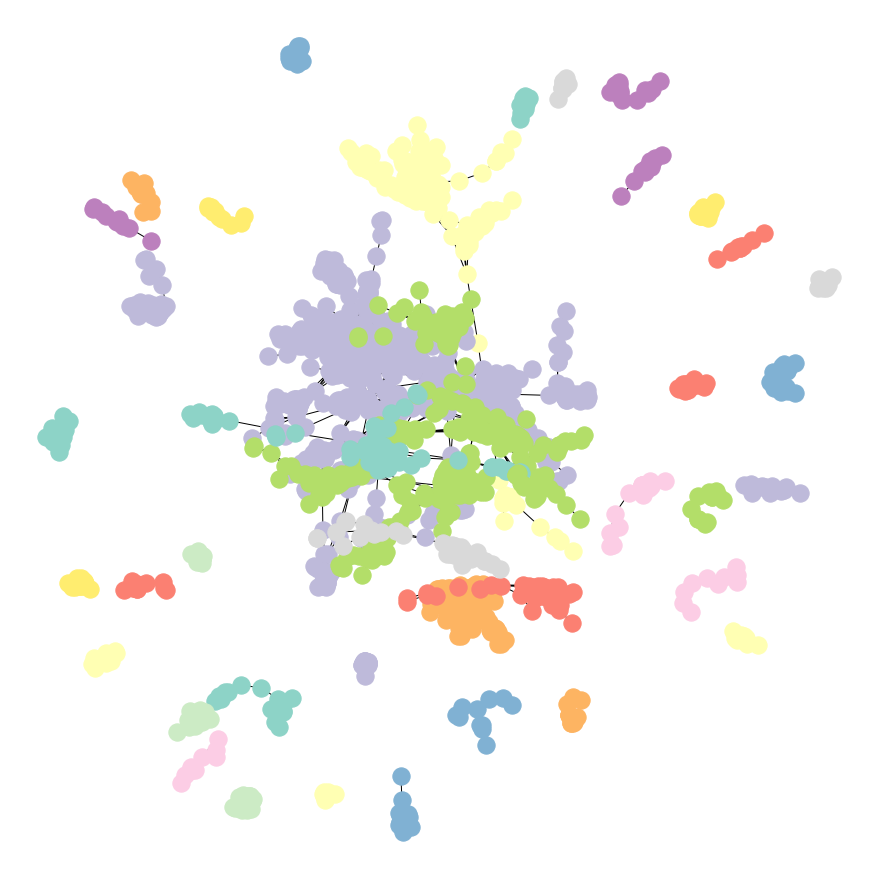

In [28]:
for index, sg in enumerate(wcc):  #there's probably a more elegant approach using zip
    nx.draw(sg, pos = pos, edges = True, node_color = [color_palette[index]])

In [25]:
most_correlated08 = combined_array[abs(combined_array["value"]) >= 0.8]

In [26]:
G08=nx.from_pandas_edgelist(most_correlated08, 'var1', 'var2')
d08 = G08.degree()

In [27]:
for component in list(nx.connected_components(G08)):
    if len(component)<10:
        for node in component:
            G08.remove_node(node)

In [29]:
wcc8 = (G08.subgraph(c) for c in nx.connected_components( G08 ))



In [30]:
for index, sg in enumerate(wcc8):
    print(sg.nodes)

['15', 'ADAMTS16', 'MMP2', '257', '381', '217', '481', '479', '62', 'CXCL12', '201', '372', '474', 'GREM1', '623', '549', '221', 'LINC01711', '414', 'LRRC17', '214', '75', '586']
['604', '721', '493', '236', '822', '345', '544', '813', '383', '553', '34', '469', '749', '244', '814', '126', '745', '631', '689', '809', '724', '48', '522', '432', '702', '992', '828', '191', '320', '473', '681', '437', '599', '370', '460', '703', '771', '219', '914', '792', '546', '561', '710', '413', '947', '657', '404', '575', '788', '708', '799', '834', '782', '311', '156', '989', '216', '204', '108', '672', 'CHRDL1', '705', '758', '684', '562', '699', '155', '28', '302', '468', '451', 'SPON2', '491', '306', '272', '142', '570', '57', '647', '661', '694', '583', '310', '485', '358', '578', '736', '668', '496', '716', '189', '729', '656', '335', '296', '179', '235', '916', '32', '361', '559', '511', '254', '207', '449', '726', '783', '987', '463', '756', '410', '622', '593', '649', '800', '707', '582', '

In [31]:
matplotlib.rcParams['figure.figsize'] = 12, 12

In [32]:
color_palette = sns.color_palette("Set3", n_colors=160)
#pos8 = nx.spring_layout(G08, seed=1234, k =0.01, iterations = 70)
#graphvis= graphviz_layout(G08, "fdp" )
pos = nx.nx_agraph.graphviz_layout(G08, prog = "neato")

wcc8 = (G08.subgraph(c) for c in nx.connected_components( G08 ))

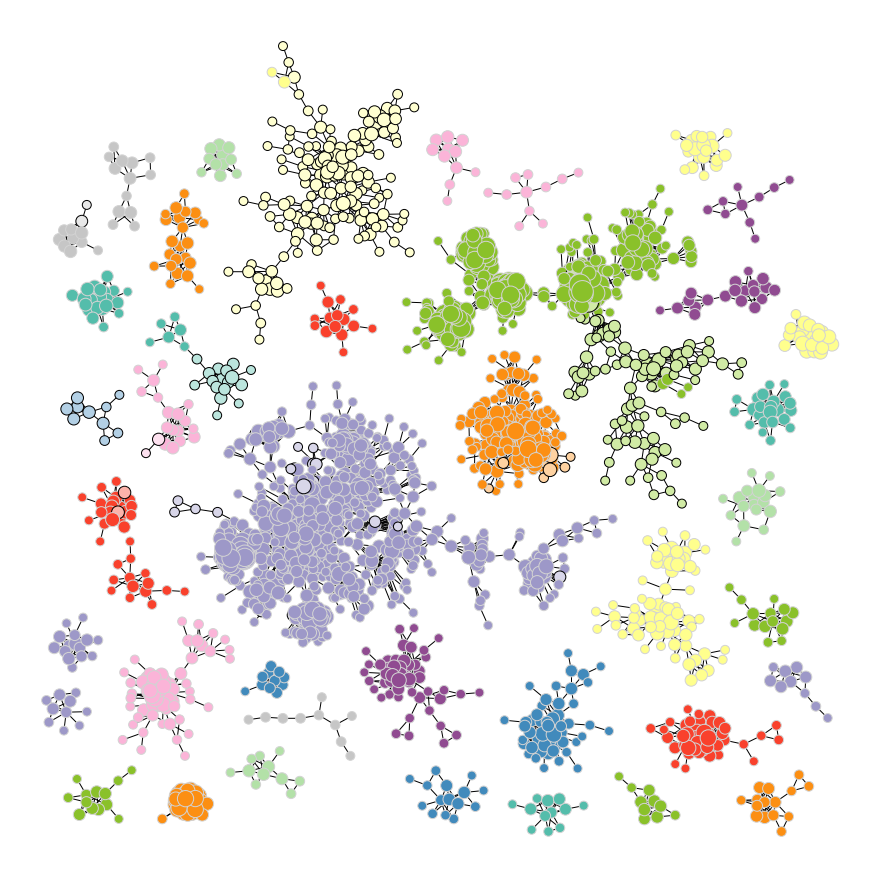

In [34]:
wcc8 = (G08.subgraph(c) for c in nx.connected_components( G08 ))
#m_degree = G08.degree()
m_degree = dict(G08.degree)

#degree_values = [v for k, v in nx.degree(G08)]
palette = sns.color_palette("Set3", n_colors=200)
palette2 = sns.color_palette("Set3", n_colors=11)*20

for index, sg in enumerate(wcc8):  #there's probably a more elegant approach using zip
    colorpalette= []
    edgecolors = []
    for item in sg.nodes():
        if ((item.isdigit())):
            colorpalette.append(lighten_color(palette2[index], amount = 0.6))
            edgecolors.append("k")
        else:
            colorpalette.append(lighten_color(palette2[index], amount = 1.5))
            edgecolors.append("#d3d3d3")
    
    nx.draw(sg, pos = pos, edges = True, node_color = colorpalette, edgecolors = edgecolors, linewidth = 1, node_size = [(v+20^5)*5 for k, v in sg.degree()])
plt.savefig("RNAseq_network_v1.png", dpi =300)

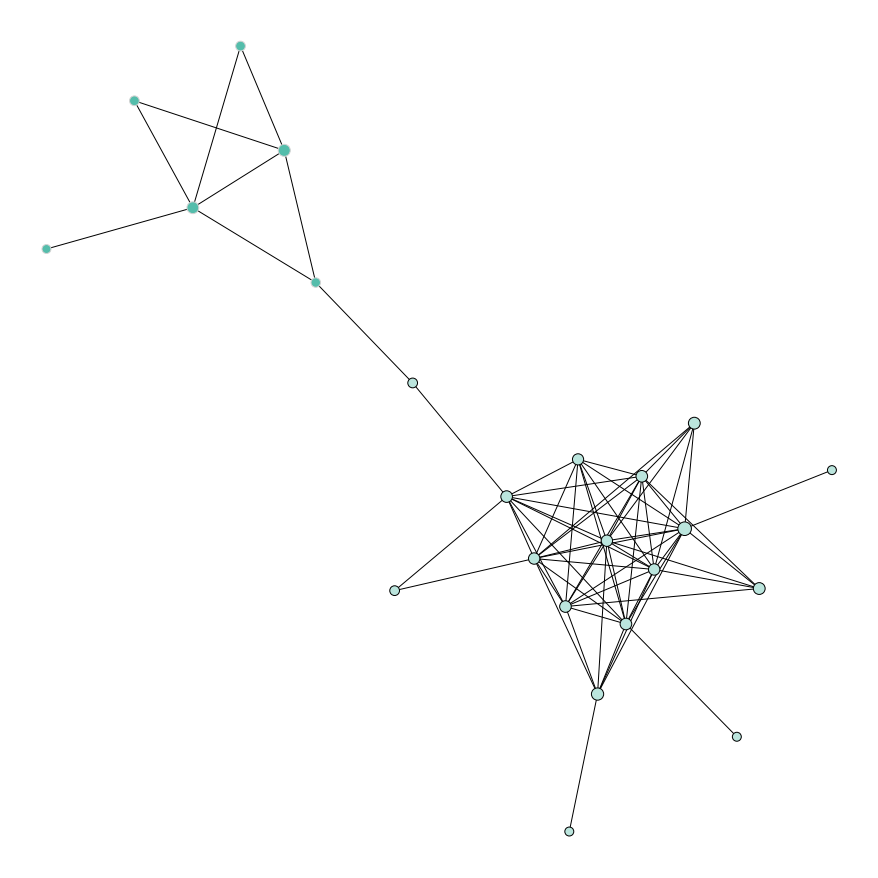

In [35]:
wcc8 = (G08.subgraph(c) for c in nx.connected_components( G08 ))
#m_degree = G08.degree()
m_degree = dict(G08.degree)

#degree_values = [v for k, v in nx.degree(G08)]
palette = sns.color_palette("Set3", n_colors=200)
palette2 = sns.color_palette("Set3", n_colors=11)*20

for index, sg in enumerate(wcc8):  #there's probably a more elegant approach using zip
    colorpalette= []
    edgecolors = []
    if index ==0:
        for item in sg.nodes():
            if ((item.isdigit())):
                colorpalette.append(lighten_color(palette2[index], amount = 0.6))
                edgecolors.append("k")
            else:
                colorpalette.append(lighten_color(palette2[index], amount = 1.5))
                edgecolors.append("#d3d3d3")
        nx.draw(sg, pos = pos, edges = True, node_color = colorpalette, edgecolors = edgecolors, linewidth = 1, node_size = [(v+20^5)*5 for k, v in sg.degree()])

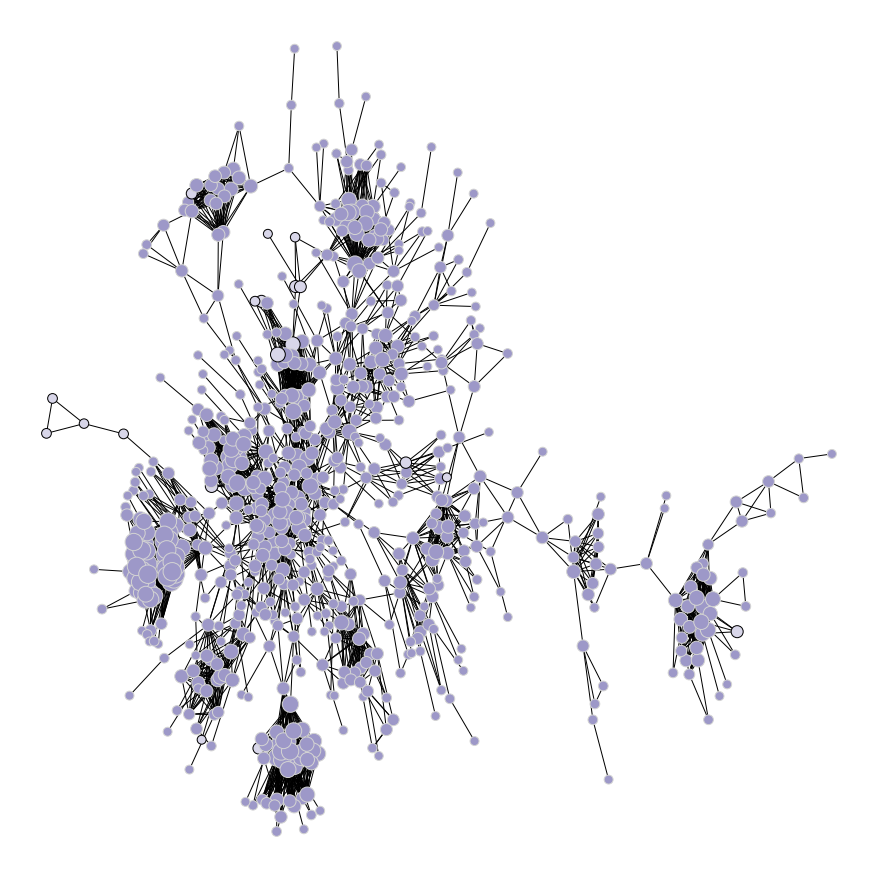

In [37]:
wcc8 = (G08.subgraph(c) for c in nx.connected_components( G08 ))
#m_degree = G08.degree()
m_degree = dict(G08.degree)

#degree_values = [v for k, v in nx.degree(G08)]
palette = sns.color_palette("Set3", n_colors=200)
palette2 = sns.color_palette("Set3", n_colors=11)*20

for index, sg in enumerate(wcc8):  #there's probably a more elegant approach using zip
    colorpalette= []
    edgecolors = []
    if index ==2:
        for item in sg.nodes():
            if ((item.isdigit())):
                colorpalette.append(lighten_color(palette2[index], amount = 0.6))
                edgecolors.append("k")
            else:
                colorpalette.append(lighten_color(palette2[index], amount = 1.5))
                edgecolors.append("#d3d3d3")
        nx.draw(sg, pos = pos, edges = True, node_color = colorpalette, edgecolors = edgecolors, linewidth = 1, node_size = [(v+20^5)*5 for k, v in sg.degree()])



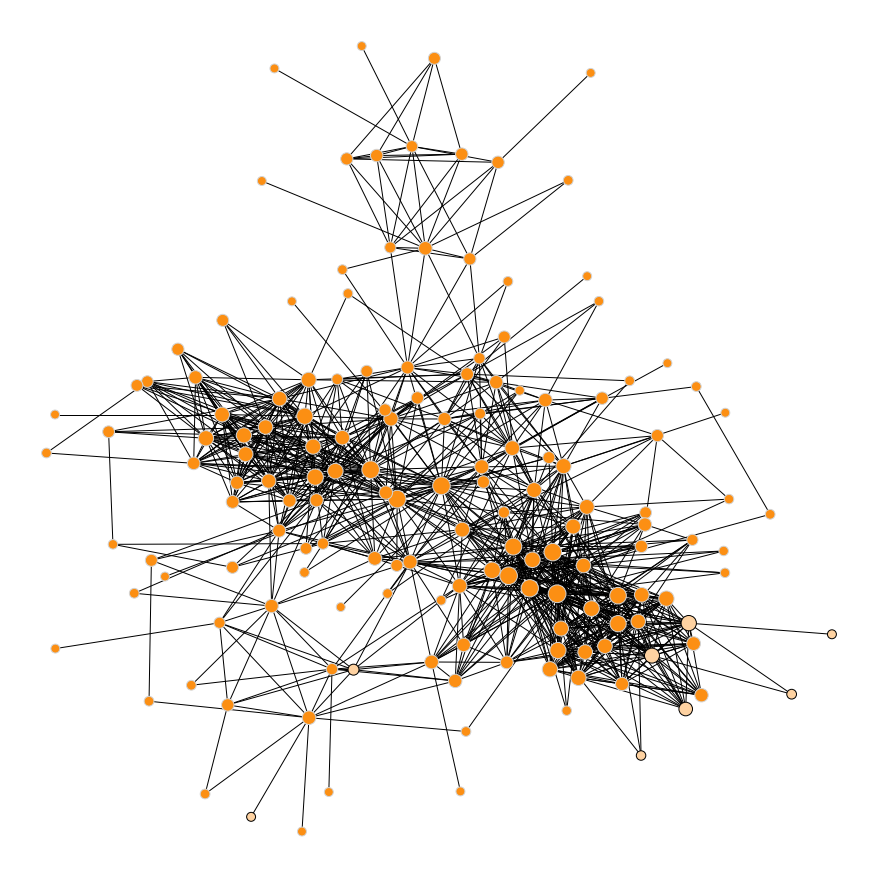

In [40]:
wcc8 = (G08.subgraph(c) for c in nx.connected_components( G08 ))
#m_degree = G08.degree()
m_degree = dict(G08.degree)

#degree_values = [v for k, v in nx.degree(G08)]
palette = sns.color_palette("Set3", n_colors=200)
palette2 = sns.color_palette("Set3", n_colors=11)*20

for index, sg in enumerate(wcc8):  #there's probably a more elegant approach using zip
    colorpalette= []
    edgecolors = []
    if index ==5:
        for item in sg.nodes():
            if ((item.isdigit())):
                colorpalette.append(lighten_color(palette2[index], amount = 0.6))
                edgecolors.append("k")
            else:
                colorpalette.append(lighten_color(palette2[index], amount = 1.5))
                edgecolors.append("#d3d3d3")
        nx.draw(sg, pos = pos, edges = True, node_color = colorpalette, edgecolors = edgecolors, linewidth = 1, node_size = [(v+20^5)*5 for k, v in sg.degree()])



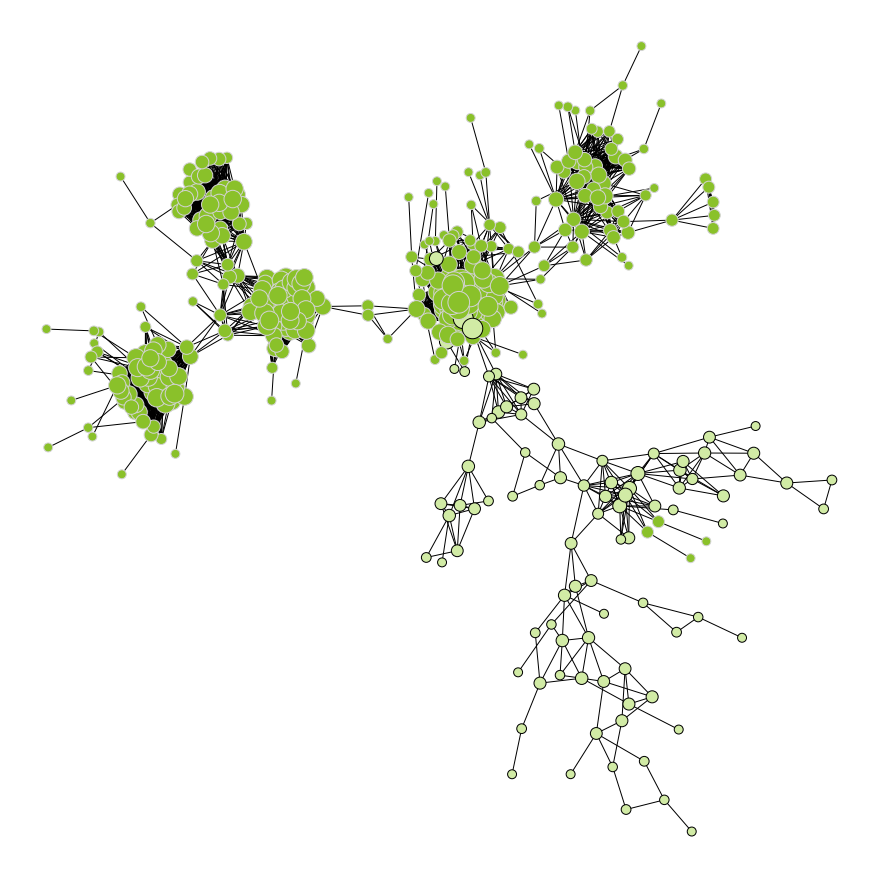

In [42]:
wcc8 = (G08.subgraph(c) for c in nx.connected_components( G08 ))
#m_degree = G08.degree()
m_degree = dict(G08.degree)

#degree_values = [v for k, v in nx.degree(G08)]
palette = sns.color_palette("Set3", n_colors=200)
palette2 = sns.color_palette("Set3", n_colors=11)*20

for index, sg in enumerate(wcc8):  #there's probably a more elegant approach using zip
    colorpalette= []
    edgecolors = []
    if index ==6:
        for item in sg.nodes():
            if ((item.isdigit())):
                colorpalette.append(lighten_color(palette2[index], amount = 0.6))
                edgecolors.append("k")
            else:
                colorpalette.append(lighten_color(palette2[index], amount = 1.5))
                edgecolors.append("#d3d3d3")
        nx.draw(sg, pos = pos, edges = True, node_color = colorpalette, edgecolors = edgecolors, linewidth = 1, node_size = [(v+20^5)*5 for k, v in sg.degree()])




In [44]:
wcc8 = (G08.subgraph(c) for c in nx.connected_components( G08 ))

teal = []
for index, sg in enumerate(wcc8):
    if index == 0:
        for item in sg.nodes:
            if item.isdigit():
                continue
            else:
                teal.append(item)

In [45]:
wcc8 = (G08.subgraph(c) for c in nx.connected_components( G08 ))

purple = []
for index, sg in enumerate(wcc8):
    if index == 2:
        for item in sg.nodes:
            if item.isdigit():
                continue
            else:
                purple.append(item)

In [46]:
wcc8 = (G08.subgraph(c) for c in nx.connected_components( G08 ))

orange = []
for index, sg in enumerate(wcc8):
    if index == 5:
        for item in sg.nodes:
            if item.isdigit():
                continue
            else:
                orange.append(item)

In [47]:
wcc8 = (G08.subgraph(c) for c in nx.connected_components( G08 ))

green = []
for index, sg in enumerate(wcc8):
    if index == 6:
        for item in sg.nodes:
            if item.isdigit():
                continue
            else:
                green.append(item)

In [48]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True, #return pandas dataframe or plain python structures    
)

In [49]:
matplotlib.rcParams['figure.figsize'] = 12, 8

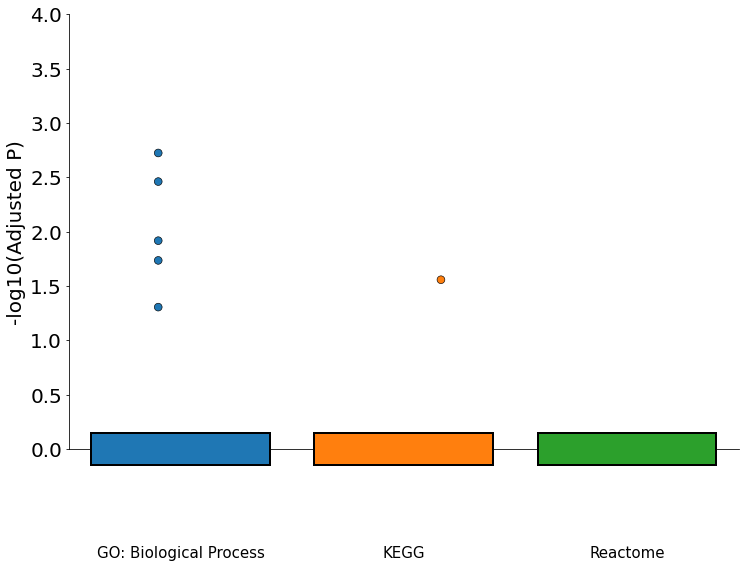

In [52]:
group1results = gp.profile(organism='hsapiens',
            query=teal)

group1results = group1results[group1results["source"].isin(["GO:BP", "KEGG", "REAC"])]

## Add one to KEGG results, add 2 to REACTOME results
group1results.loc[group1results["source"] == "KEGG", "precision"] = group1results.loc[group1results["source"] == "KEGG", "precision"] +1
group1results.loc[group1results["source"] == "REAC", "precision"] = group1results.loc[group1results["source"] == "REAC", "precision"] +2

group1results = group1results.sort_values(by = "precision", ascending = True)

group1results.to_csv("teal_gprofiler_results.csv")

g = sns.scatterplot(y = -np.log10(group1results["p_value"]), x = group1results["precision"], hue = group1results["source"],
                   s = group1results["intersection_size"]* 30, edgecolor = "k", lw = 2, legend=False)

g.set_xlim(0,3)
g.set_ylabel("-log10(Adjusted P)", size = 20)
g.set_ylim(0,4)
g.set_yticklabels(g.get_yticks(), size = 20)

g.set_xlabel("")
g.set_xticks([])


sns.despine()

rect = patches.Rectangle((0.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[0]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((1.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[1]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((2.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[2]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

g.text(0.5, -1, "GO: Biological Process", horizontalalignment='center', size=15, color='black')
g.text(1.5, -1, "KEGG", horizontalalignment='center', size=15, color='black')
g.text(2.5, -1, "Reactome", horizontalalignment='center', size=15, color='black')

plt.savefig("teal_gprofiler_enrichmentplot.pdf", bbox_inches = "tight")

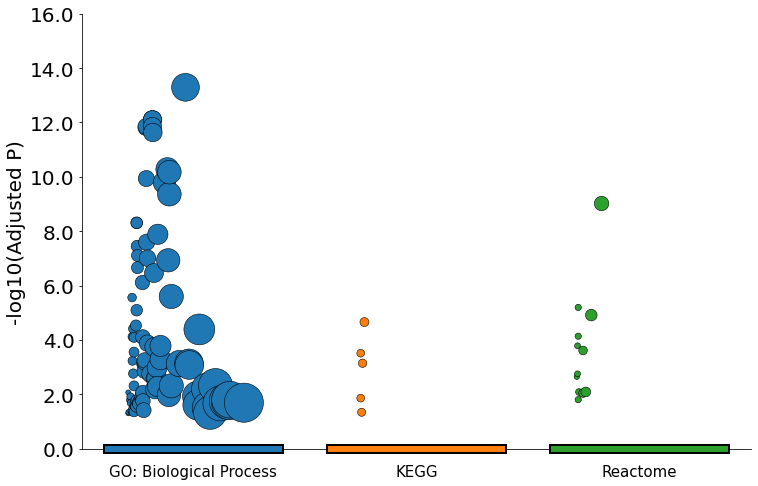

In [55]:
group1results = gp.profile(organism='hsapiens',
            query=purple)

group1results = group1results[group1results["source"].isin(["GO:BP", "KEGG", "REAC"])]

## Add one to KEGG results, add 2 to REACTOME results
group1results.loc[group1results["source"] == "KEGG", "precision"] = group1results.loc[group1results["source"] == "KEGG", "precision"] +1
group1results.loc[group1results["source"] == "REAC", "precision"] = group1results.loc[group1results["source"] == "REAC", "precision"] +2

group1results = group1results.sort_values(by = "precision", ascending = True)

group1results.to_csv("purple_gprofiler_results.csv")

g = sns.scatterplot(y = -np.log10(group1results["p_value"]), x = group1results["precision"]+0.2, hue = group1results["source"],
                   s = group1results["intersection_size"]* 5, edgecolor = "k", lw = 2, legend=False)

g.set_xlim(0,3)
g.set_ylabel("-log10(Adjusted P)", size = 20)
g.set_ylim(0,16)
g.set_yticklabels(g.get_yticks(), size = 20)

g.set_xlabel("")
g.set_xticks([])


sns.despine()

rect = patches.Rectangle((0.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[0]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((1.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[1]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((2.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[2]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

g.text(0.5, -1, "GO: Biological Process", horizontalalignment='center', size=15, color='black')
g.text(1.5, -1, "KEGG", horizontalalignment='center', size=15, color='black')
g.text(2.5, -1, "Reactome", horizontalalignment='center', size=15, color='black')

plt.savefig("purple_gprofiler_enrichmentplot.pdf", bbox_inches = "tight")

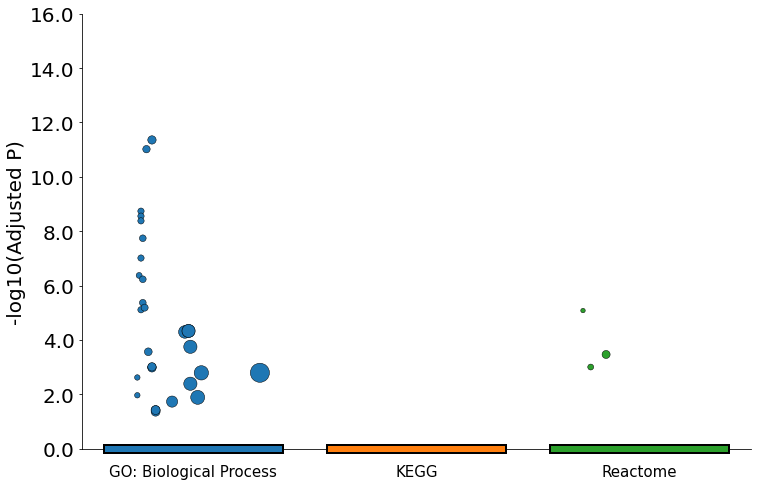

In [59]:
group2results = gp.profile(organism='hsapiens',
            query=orange)

group2results = group2results[group2results["source"].isin(["GO:BP", "KEGG", "REAC"])]

## Add one to KEGG results, add 2 to REACTOME results
group2results.loc[group2results["source"] == "KEGG", "precision"] = group2results.loc[group2results["source"] == "KEGG", "precision"] +1
group2results.loc[group2results["source"] == "REAC", "precision"] = group2results.loc[group2results["source"] == "REAC", "precision"] +2

group2results = group2results.sort_values(by = "precision", ascending = True)

group2results.to_csv("orange_gprofiler_results.csv")

g = sns.scatterplot(y = -np.log10(group2results["p_value"]), x = group2results["precision"]+0.2, hue = group2results["source"],
                   s = group2results["intersection_size"]* 5, edgecolor = "k", lw = 2, legend=False, hue_order=["GO:BP", "KEGG", "REAC"])

g.set_xlim(0,3)
g.set_ylabel("-log10(Adjusted P)", size = 20)
g.set_ylim(0,16)
g.set_yticklabels(g.get_yticks(), size = 20)

g.set_xlabel("")
g.set_xticks([])


sns.despine()

rect = patches.Rectangle((0.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[0]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((1.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[1]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((2.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[2]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

g.text(0.5, -1, "GO: Biological Process", horizontalalignment='center', size=15, color='black')
g.text(1.5, -1, "KEGG", horizontalalignment='center', size=15, color='black')
g.text(2.5, -1, "Reactome", horizontalalignment='center', size=15, color='black')

plt.savefig("orange_gprofiler_enrichmentplot.pdf", bbox_inches = "tight")

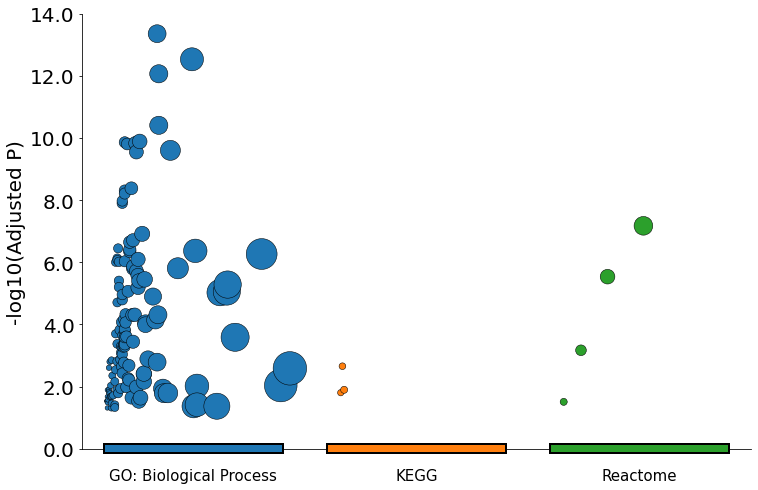

In [62]:
group4results = gp.profile(organism='hsapiens',
            query=green)

group4results = group4results[group4results["source"].isin(["GO:BP", "KEGG", "REAC"])]

## Add one to KEGG results, add 2 to REACTOME results
group4results.loc[group4results["source"] == "KEGG", "precision"] = group4results.loc[group4results["source"] == "KEGG", "precision"] +1
group4results.loc[group4results["source"] == "REAC", "precision"] = group4results.loc[group4results["source"] == "REAC", "precision"] +2

group4results = group4results.sort_values(by = "precision", ascending = True)

group4results.to_csv("green_gprofiler_results.csv")

g = sns.scatterplot(y = -np.log10(group4results["p_value"]), x = group4results["precision"]+0.1, hue = group4results["source"],
                   s = group4results["intersection_size"]* 5, edgecolor = "k", lw = 2, legend=False)

g.set_xlim(0,3)
g.set_ylabel("-log10(Adjusted P)", size = 20)
g.set_ylim(0,14)
g.set_yticklabels(g.get_yticks(), size = 20)

g.set_xlabel("")
g.set_xticks([])


sns.despine()

rect = patches.Rectangle((0.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[0]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((1.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[1]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

rect = patches.Rectangle((2.1,-0.15),0.8,0.3,linewidth=2, edgecolor = "k", facecolor=sns.color_palette().as_hex()[2]
                         , clip_on = False, zorder = 10)
g.add_patch(rect)

g.text(0.5, -1, "GO: Biological Process", horizontalalignment='center', size=15, color='black')
g.text(1.5, -1, "KEGG", horizontalalignment='center', size=15, color='black')
g.text(2.5, -1, "Reactome", horizontalalignment='center', size=15, color='black')

plt.savefig("green_gprofiler_enrichmentplot.pdf", bbox_inches = "tight")

